In [2]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

import pickle

import sys
sys.path.append('./../..')

import AutoDot

from AutoDot.cs_comp_utils import gate_comp, comp_matrix

import AutoDot.perform_registration as pr


In [3]:
import sys 
sys.path.append("/home/joseph/Insync/charge_sensor/data/20200904_device_crosstalk/")

In [4]:
gates = ["c8", "c9", "c10", "c11"]

voltages = np.linspace(0, 1500, 16)

In [5]:
dirs = []
data_dict = {}
not_found = 0
for gate in gates:
    for voltage in voltages:
        directory = "run2_" + gate + "_" + str(voltage) + "_ist1_crosstalk" 
        dirs.append(directory)
        
        try: 
            with open("/home/joseph/Insync/charge_sensor/data/20200904_device_crosstalk/" + directory + '/tuning.pkl', 'rb') as f: 
                data = pickle.load(f)
                data_dict[gate + "_" + str(voltage)] = data
        except FileNotFoundError as e: 
            print(e)
            not_found += 1
    


[Errno 2] No such file or directory: '/home/joseph/Insync/charge_sensor/data/20200904_device_crosstalk/run2_c8_1200.0_ist1_crosstalk/tuning.pkl'
[Errno 2] No such file or directory: '/home/joseph/Insync/charge_sensor/data/20200904_device_crosstalk/run2_c8_1300.0_ist1_crosstalk/tuning.pkl'
[Errno 2] No such file or directory: '/home/joseph/Insync/charge_sensor/data/20200904_device_crosstalk/run2_c8_1400.0_ist1_crosstalk/tuning.pkl'
[Errno 2] No such file or directory: '/home/joseph/Insync/charge_sensor/data/20200904_device_crosstalk/run2_c8_1500.0_ist1_crosstalk/tuning.pkl'
[Errno 2] No such file or directory: '/home/joseph/Insync/charge_sensor/data/20200904_device_crosstalk/run2_c10_1100.0_ist1_crosstalk/tuning.pkl'
[Errno 2] No such file or directory: '/home/joseph/Insync/charge_sensor/data/20200904_device_crosstalk/run2_c10_1200.0_ist1_crosstalk/tuning.pkl'
[Errno 2] No such file or directory: '/home/joseph/Insync/charge_sensor/data/20200904_device_crosstalk/run2_c10_1300.0_ist1_cros

In [6]:
print(not_found)

9


In [7]:
def plot_gate(name, voltages): 
    trans = np.array(get_all_gate_transforms(name, voltages))
    plt.figure()
    plt.plot(voltages[:len(trans)], trans[:, 0, 0], label="CS2")
    plt.plot(voltages[:len(trans)], trans[:, 1, 1], label="plunger")
    plt.plot(voltages[:len(trans)], trans[:, 2, 2], label="CS1")
    plt.legend()
    plt.xlabel("Gate voltage")
    plt.ylabel("Scaling value")
    plt.title(name.upper())
    plt.show()

def get_poff_points(entry): 
    full_points = np.array(data_dict[entry]['vols_pinchoff'])
    bool_list = list(map(bool, data_dict[entry]['conditional_idx']))
    poff_points = full_points[bool_list]
    return poff_points

def get_all_gate_transforms(gate, voltages): 
    keys = [gate + "_" + str(voltage) for voltage in voltages]
    point_sets = []
    
    for key in keys: 
        try: 
            
            x = get_poff_points(key)
            if len(x) == 0: 
                break 
            point_sets.append(x)
        # catch error caused by missing file - in turn caused by pinchoff issue solved with try/except 
        except KeyError: 
            pass

    transforms = []
    
    print(len(point_sets))
    
    for point_set in point_sets: 
        #print("point set \n", point_set)
        transforms.append(pr.scaling_registration(point_sets[0].T, point_set.T))

    return transforms

11
First transform:  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


<IPython.core.display.Javascript object>


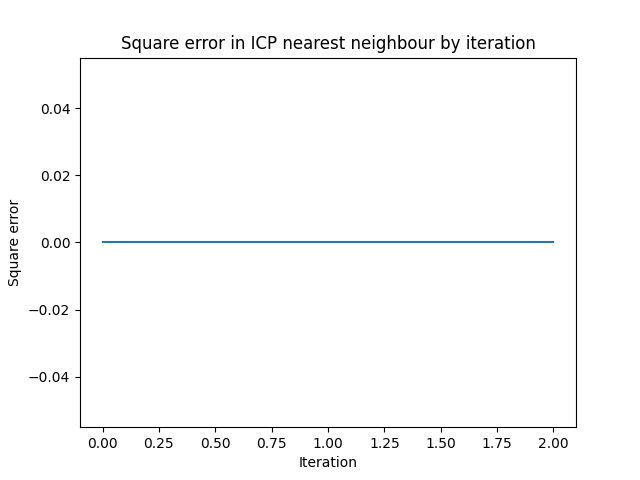

final transform:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
First transform:  [[0.97684501 0.         0.        ]
 [0.         0.97684501 0.        ]
 [0.         0.         0.97684501]]


<IPython.core.display.Javascript object>


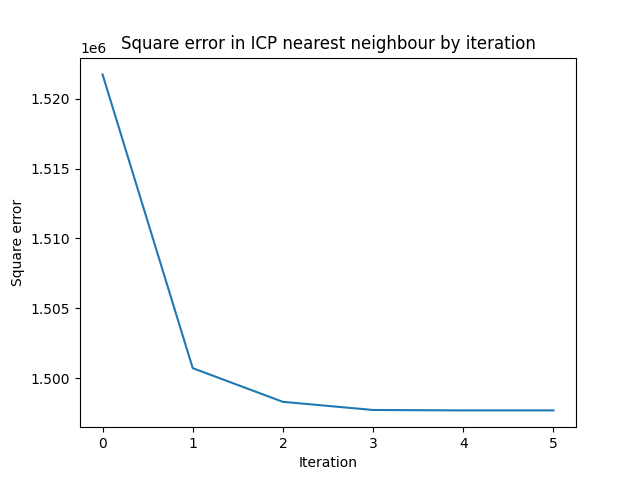

final transform:
 [[0.99934606 0.         0.        ]
 [0.         0.97822282 0.        ]
 [0.         0.         1.00033059]]
First transform:  [[0.99685272 0.         0.        ]
 [0.         0.99685272 0.        ]
 [0.         0.         0.99685272]]


<IPython.core.display.Javascript object>


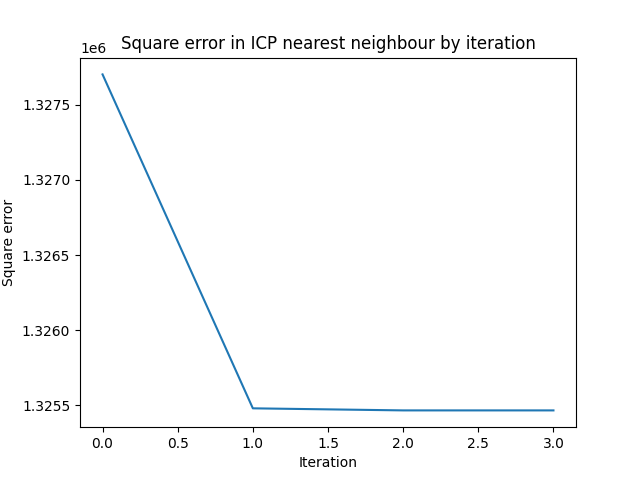

final transform:
 [[0.99954308 0.         0.        ]
 [0.         0.99412627 0.        ]
 [0.         0.         1.00205955]]
First transform:  [[0.99292302 0.         0.        ]
 [0.         0.99292302 0.        ]
 [0.         0.         0.99292302]]


<IPython.core.display.Javascript object>


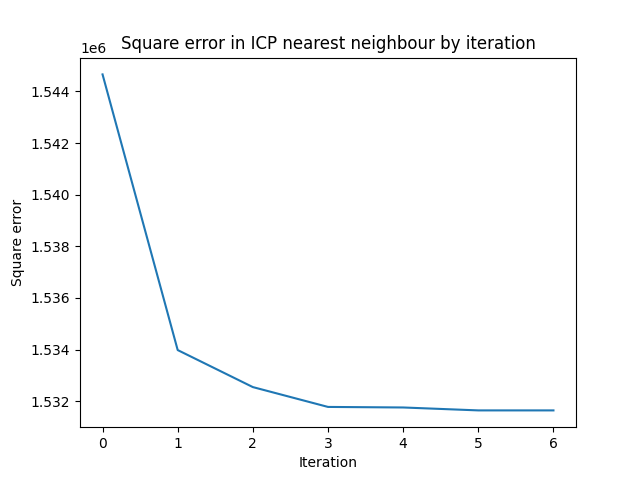

final transform:
 [[1.00719245 0.         0.        ]
 [0.         0.98499095 0.        ]
 [0.         0.         1.00346716]]
First transform:  [[0.99687305 0.         0.        ]
 [0.         0.99687305 0.        ]
 [0.         0.         0.99687305]]


<IPython.core.display.Javascript object>


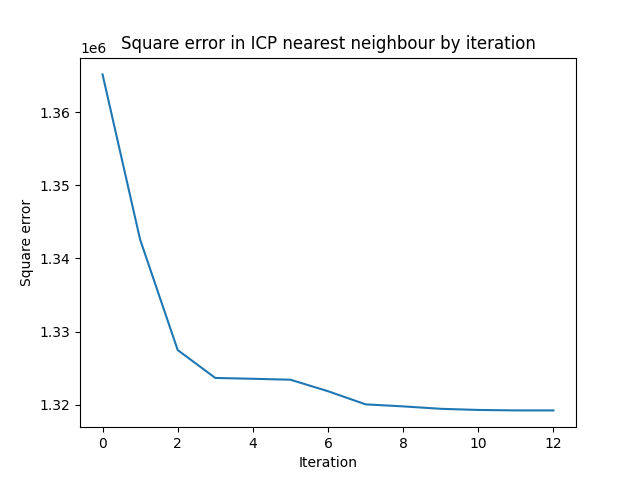

final transform:
 [[1.00838918 0.         0.        ]
 [0.         0.97379182 0.        ]
 [0.         0.         0.99766849]]
First transform:  [[0.99280408 0.         0.        ]
 [0.         0.99280408 0.        ]
 [0.         0.         0.99280408]]


<IPython.core.display.Javascript object>


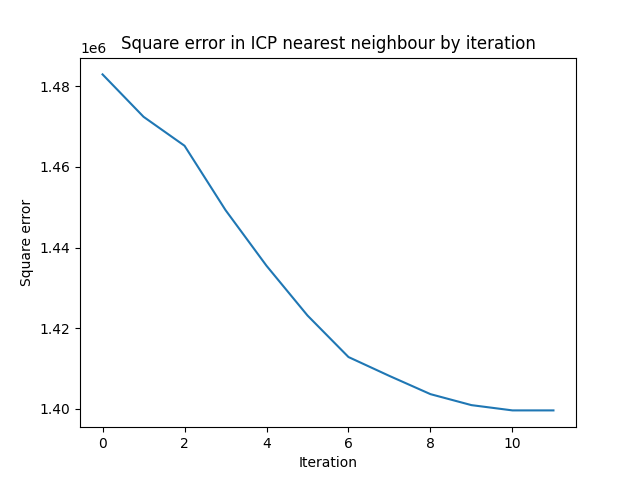

final transform:
 [[1.00686728 0.         0.        ]
 [0.         1.02726802 0.        ]
 [0.         0.         1.00656912]]
First transform:  [[0.99727346 0.         0.        ]
 [0.         0.99727346 0.        ]
 [0.         0.         0.99727346]]


<IPython.core.display.Javascript object>


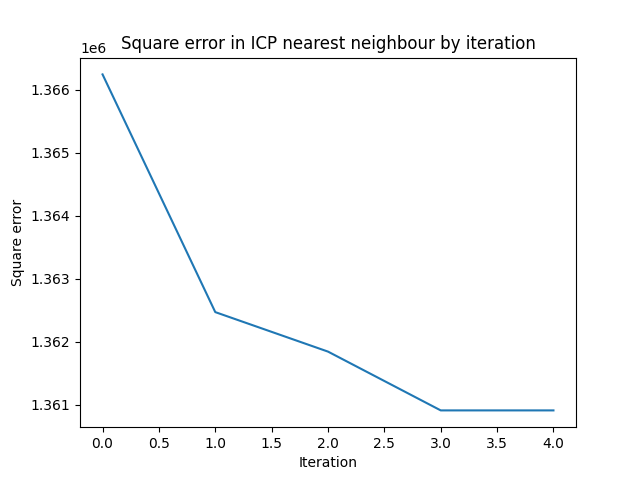

final transform:
 [[1.00381817 0.         0.        ]
 [0.         0.99205011 0.        ]
 [0.         0.         1.00761578]]
First transform:  [[0.99935443 0.         0.        ]
 [0.         0.99935443 0.        ]
 [0.         0.         0.99935443]]


<IPython.core.display.Javascript object>


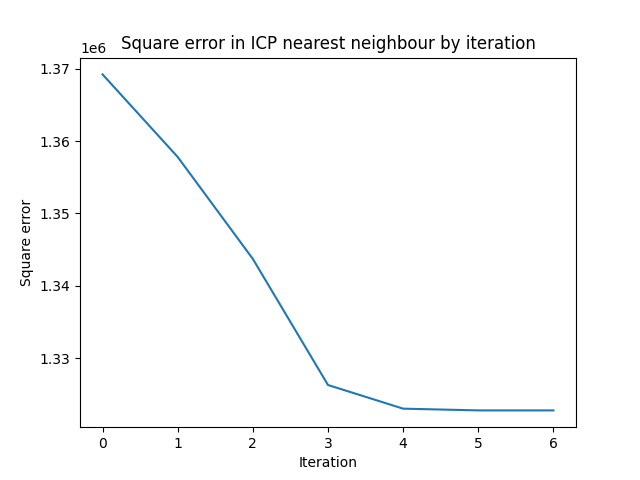

final transform:
 [[0.99905512 0.         0.        ]
 [0.         0.97660234 0.        ]
 [0.         0.         1.00357253]]
First transform:  [[0.98743375 0.         0.        ]
 [0.         0.98743375 0.        ]
 [0.         0.         0.98743375]]


<IPython.core.display.Javascript object>


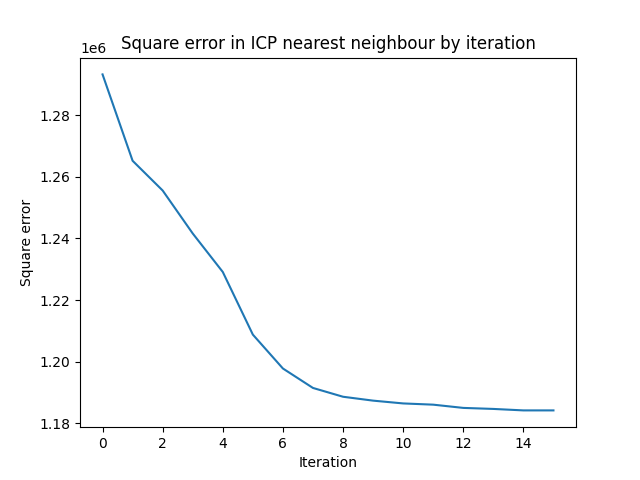

final transform:
 [[1.00302529 0.         0.        ]
 [0.         0.94112355 0.        ]
 [0.         0.         0.9991418 ]]
First transform:  [[1.00376802 0.         0.        ]
 [0.         1.00376802 0.        ]
 [0.         0.         1.00376802]]


<IPython.core.display.Javascript object>


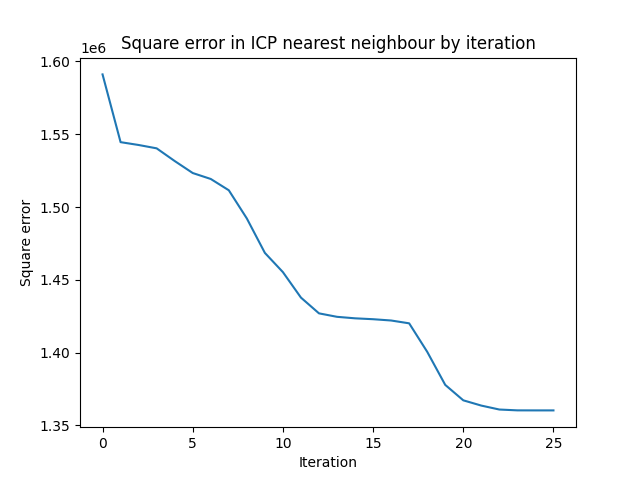

final transform:
 [[1.03207289 0.         0.        ]
 [0.         0.92595307 0.        ]
 [0.         0.         1.03506865]]
First transform:  [[0.99344684 0.         0.        ]
 [0.         0.99344684 0.        ]
 [0.         0.         0.99344684]]


<IPython.core.display.Javascript object>


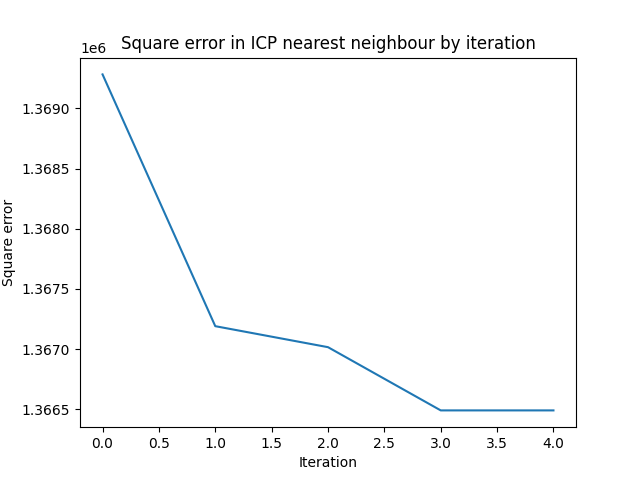

final transform:
 [[0.99408227 0.         0.        ]
 [0.         0.99326483 0.        ]
 [0.         0.         1.00392851]]


<IPython.core.display.Javascript object>


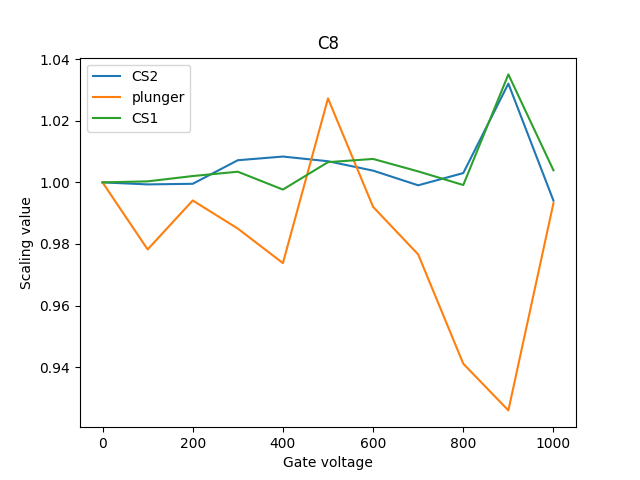

In [8]:
plot_gate("c8", voltages)

16
First transform:  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


<IPython.core.display.Javascript object>


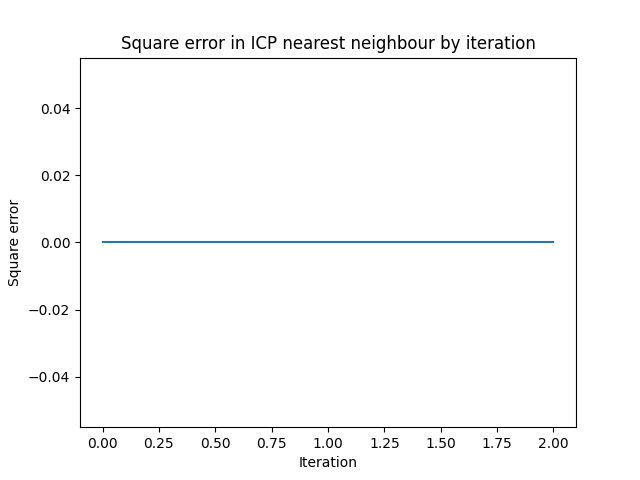

final transform:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
First transform:  [[0.98890642 0.         0.        ]
 [0.         0.98890642 0.        ]
 [0.         0.         0.98890642]]


<IPython.core.display.Javascript object>


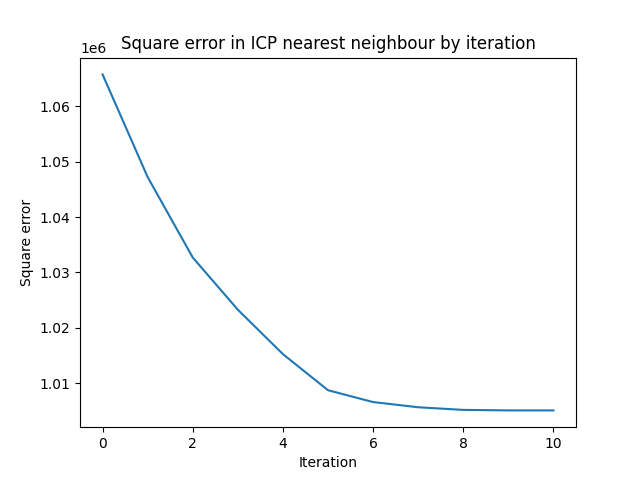

final transform:
 [[1.00155522 0.         0.        ]
 [0.         0.96131002 0.        ]
 [0.         0.         0.99459577]]
First transform:  [[1.00145187 0.         0.        ]
 [0.         1.00145187 0.        ]
 [0.         0.         1.00145187]]


<IPython.core.display.Javascript object>


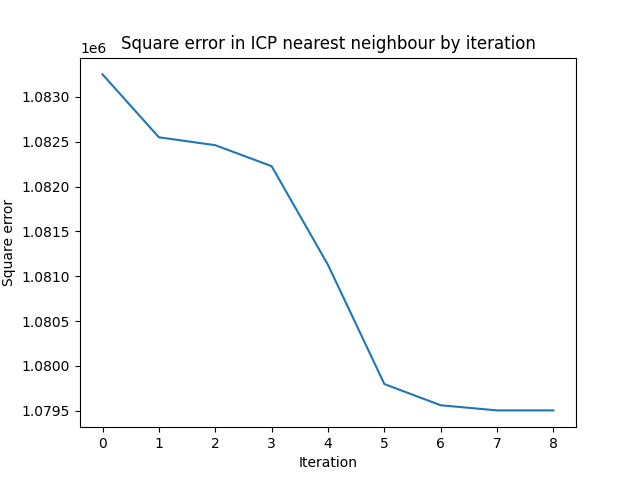

final transform:
 [[1.00105312 0.         0.        ]
 [0.         1.00767203 0.        ]
 [0.         0.         0.99355903]]
First transform:  [[0.99567986 0.         0.        ]
 [0.         0.99567986 0.        ]
 [0.         0.         0.99567986]]


<IPython.core.display.Javascript object>


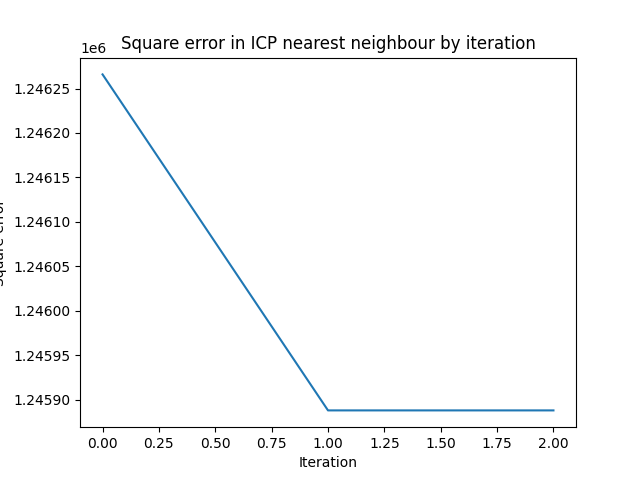

final transform:
 [[0.99942144 0.         0.        ]
 [0.         0.99714135 0.        ]
 [0.         0.         0.99504337]]
First transform:  [[0.99636014 0.         0.        ]
 [0.         0.99636014 0.        ]
 [0.         0.         0.99636014]]


<IPython.core.display.Javascript object>


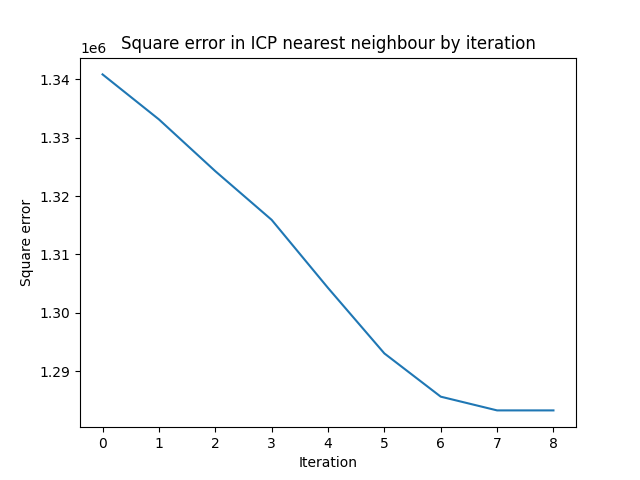

final transform:
 [[1.00243085 0.         0.        ]
 [0.         0.96836493 0.        ]
 [0.         0.         0.99564682]]
First transform:  [[0.99939509 0.         0.        ]
 [0.         0.99939509 0.        ]
 [0.         0.         0.99939509]]


<IPython.core.display.Javascript object>


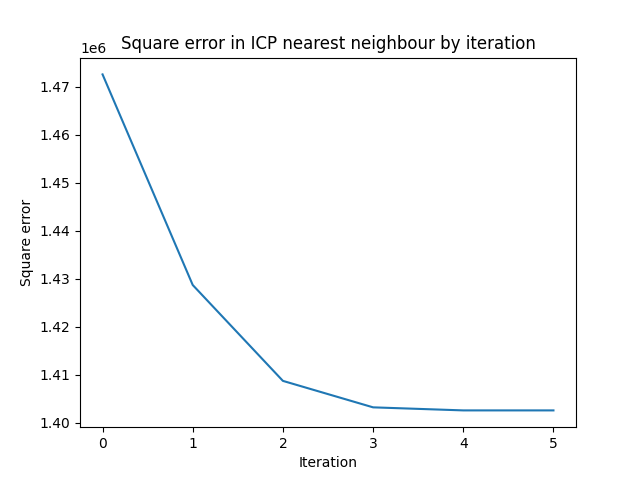

final transform:
 [[0.99828174 0.         0.        ]
 [0.         0.97355968 0.        ]
 [0.         0.         0.99522869]]
First transform:  [[0.99328145 0.         0.        ]
 [0.         0.99328145 0.        ]
 [0.         0.         0.99328145]]


<IPython.core.display.Javascript object>


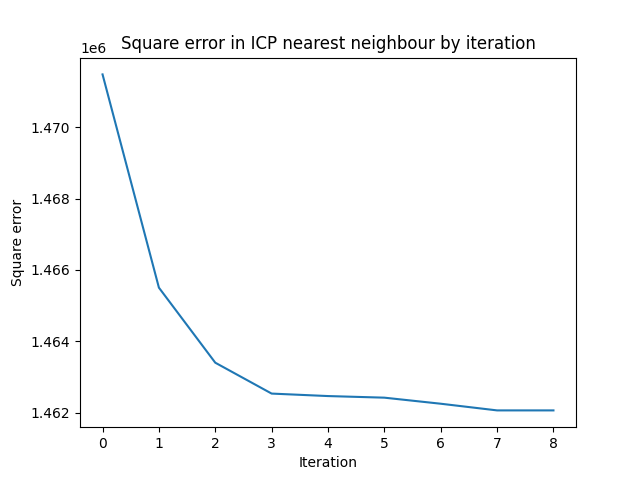

final transform:
 [[0.99435682 0.         0.        ]
 [0.         1.00325742 0.        ]
 [0.         0.         1.00089594]]
First transform:  [[0.99257124 0.         0.        ]
 [0.         0.99257124 0.        ]
 [0.         0.         0.99257124]]


<IPython.core.display.Javascript object>


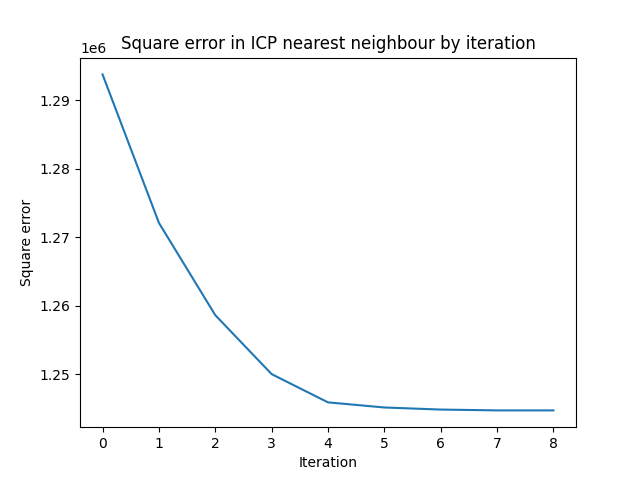

final transform:
 [[0.99524227 0.         0.        ]
 [0.         0.96889274 0.        ]
 [0.         0.         1.00032124]]
First transform:  [[1.00564332 0.         0.        ]
 [0.         1.00564332 0.        ]
 [0.         0.         1.00564332]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


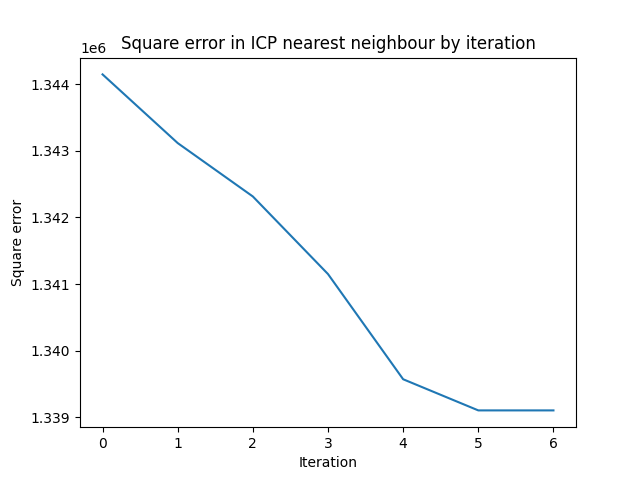

final transform:
 [[1.00453032 0.         0.        ]
 [0.         0.99664746 0.        ]
 [0.         0.         0.99661275]]
First transform:  [[0.99284661 0.         0.        ]
 [0.         0.99284661 0.        ]
 [0.         0.         0.99284661]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


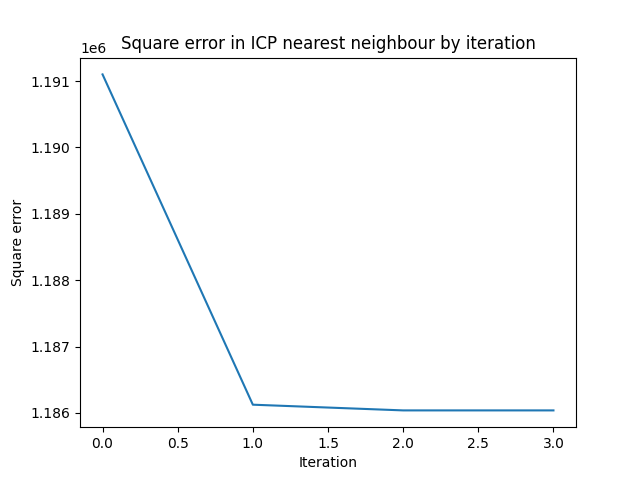

final transform:
 [[0.99366017 0.         0.        ]
 [0.         0.98577884 0.        ]
 [0.         0.         0.99571992]]
First transform:  [[0.98547212 0.         0.        ]
 [0.         0.98547212 0.        ]
 [0.         0.         0.98547212]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


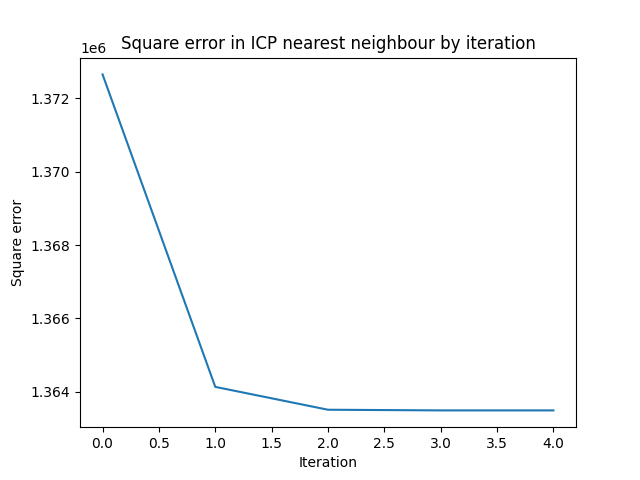

final transform:
 [[0.99495243 0.         0.        ]
 [0.         0.98841547 0.        ]
 [0.         0.         0.99847532]]
First transform:  [[0.98943817 0.         0.        ]
 [0.         0.98943817 0.        ]
 [0.         0.         0.98943817]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


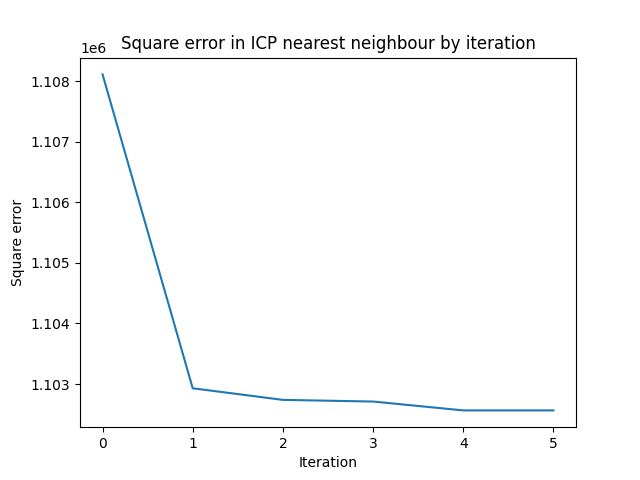

final transform:
 [[0.99590354 0.         0.        ]
 [0.         0.98027711 0.        ]
 [0.         0.         0.99209089]]
First transform:  [[0.98184264 0.         0.        ]
 [0.         0.98184264 0.        ]
 [0.         0.         0.98184264]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


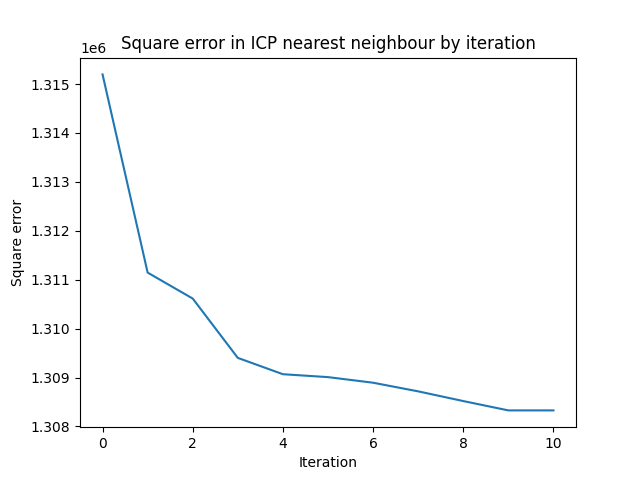

final transform:
 [[0.99498826 0.         0.        ]
 [0.         0.97480503 0.        ]
 [0.         0.         0.99185778]]
First transform:  [[0.99448496 0.         0.        ]
 [0.         0.99448496 0.        ]
 [0.         0.         0.99448496]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


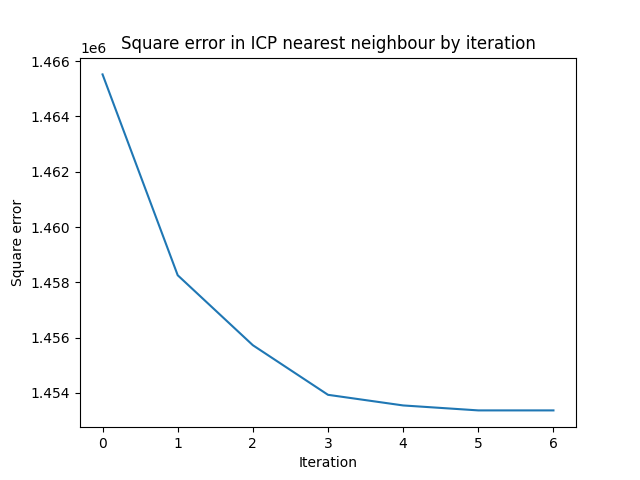

final transform:
 [[0.99473558 0.         0.        ]
 [0.         0.98298547 0.        ]
 [0.         0.         0.99132902]]
First transform:  [[0.97813128 0.         0.        ]
 [0.         0.97813128 0.        ]
 [0.         0.         0.97813128]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


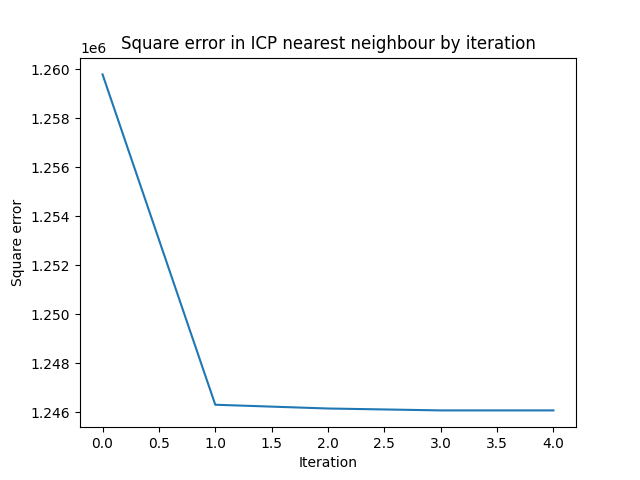

final transform:
 [[0.9927306  0.         0.        ]
 [0.         0.97761256 0.        ]
 [0.         0.         0.99553259]]
First transform:  [[0.99598085 0.         0.        ]
 [0.         0.99598085 0.        ]
 [0.         0.         0.99598085]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


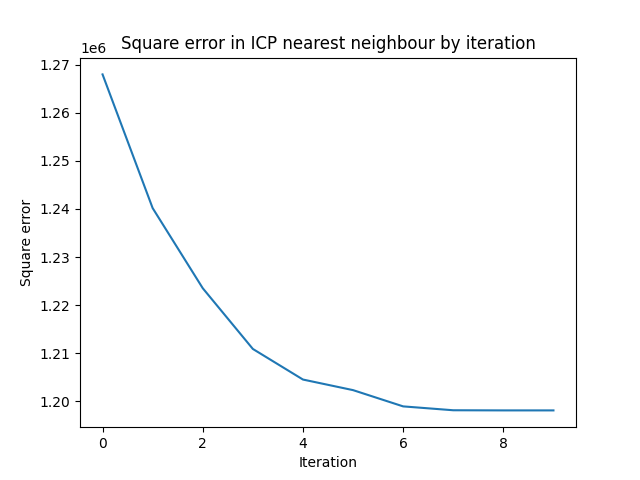

final transform:
 [[0.988164   0.         0.        ]
 [0.         0.96565395 0.        ]
 [0.         0.         0.99860229]]


 <ipython-input-7-fc972adf82d9>:3: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


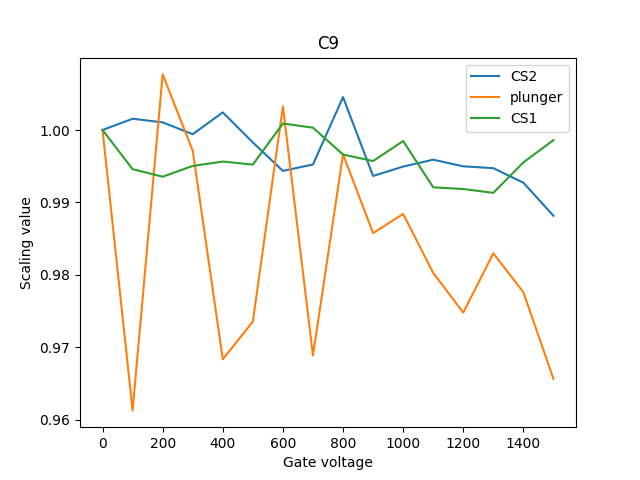

In [9]:
plot_gate("c9", voltages)

10
First transform:  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


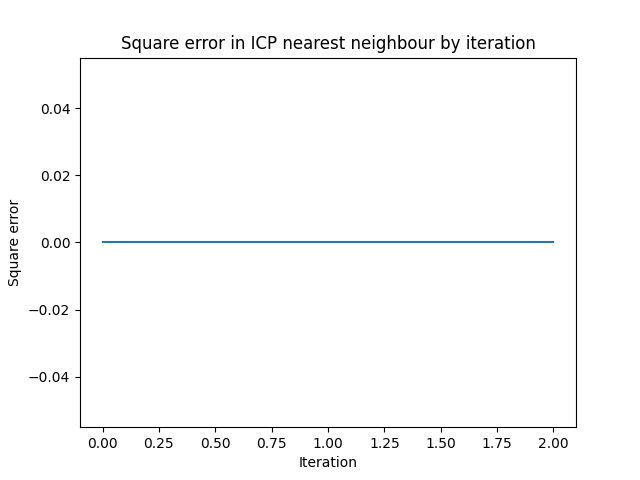

final transform:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
First transform:  [[1.00245076 0.         0.        ]
 [0.         1.00245076 0.        ]
 [0.         0.         1.00245076]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


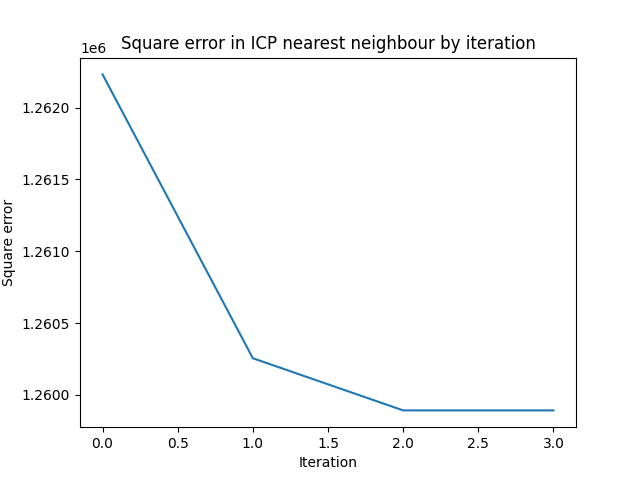

final transform:
 [[1.00029243 0.         0.        ]
 [0.         1.00615277 0.        ]
 [0.         0.         0.99717803]]
First transform:  [[0.99748514 0.         0.        ]
 [0.         0.99748514 0.        ]
 [0.         0.         0.99748514]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


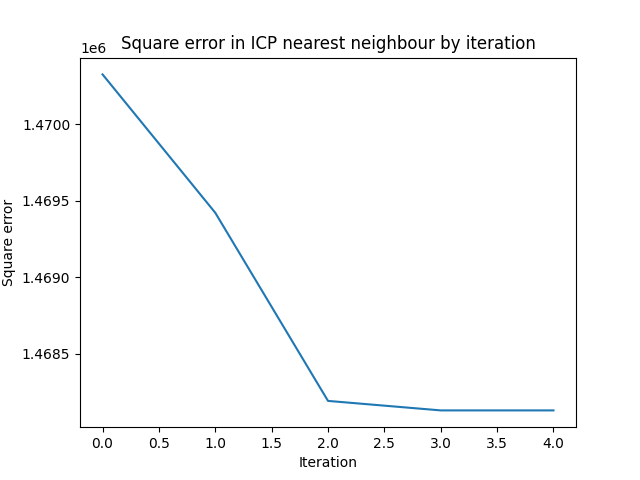

final transform:
 [[1.00146072 0.         0.        ]
 [0.         0.9945467  0.        ]
 [0.         0.         1.00177106]]
First transform:  [[0.99590292 0.         0.        ]
 [0.         0.99590292 0.        ]
 [0.         0.         0.99590292]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


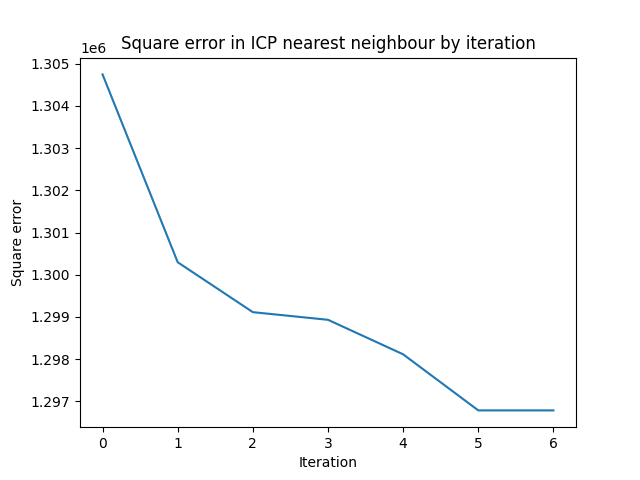

final transform:
 [[0.99625647 0.         0.        ]
 [0.         1.00644293 0.        ]
 [0.         0.         0.99599201]]
First transform:  [[0.9944331 0.        0.       ]
 [0.        0.9944331 0.       ]
 [0.        0.        0.9944331]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


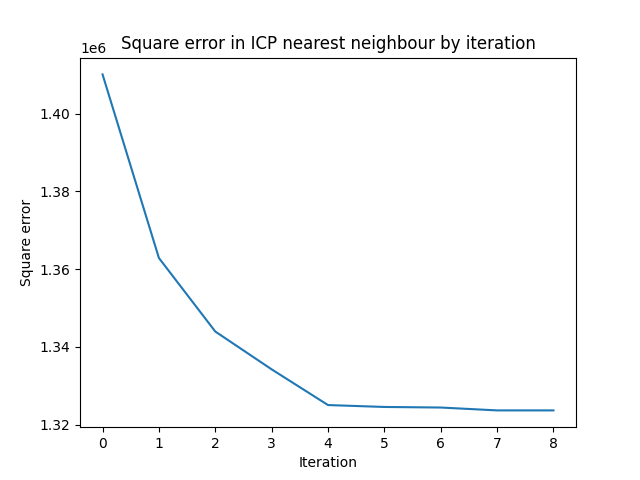

final transform:
 [[0.99583795 0.         0.        ]
 [0.         0.9636869  0.        ]
 [0.         0.         1.00233798]]
First transform:  [[0.99402087 0.         0.        ]
 [0.         0.99402087 0.        ]
 [0.         0.         0.99402087]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


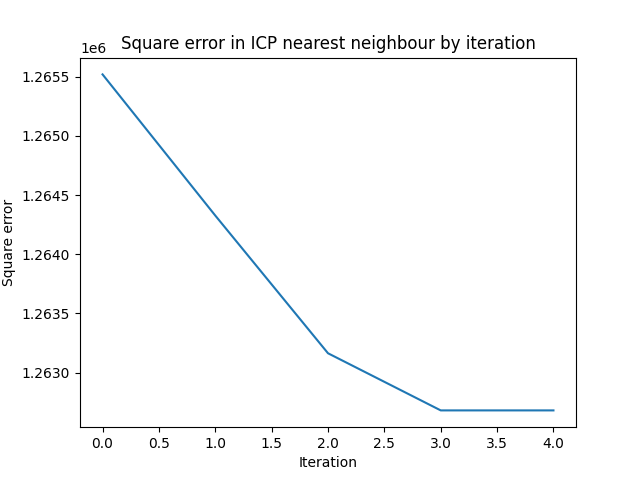

final transform:
 [[0.99455047 0.         0.        ]
 [0.         0.99799298 0.        ]
 [0.         0.         0.99756345]]
First transform:  [[0.98281808 0.         0.        ]
 [0.         0.98281808 0.        ]
 [0.         0.         0.98281808]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


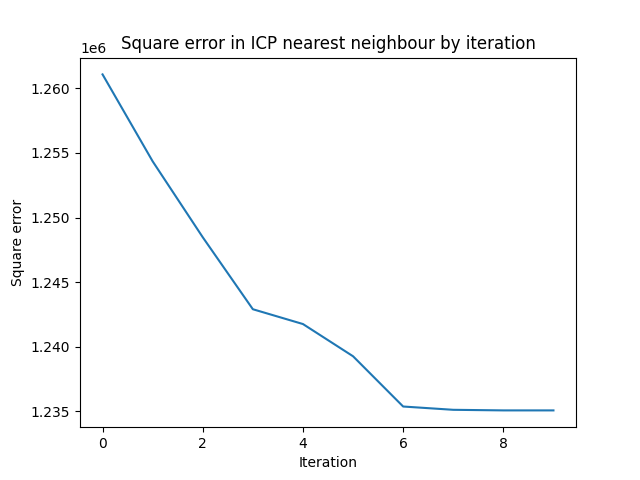

final transform:
 [[0.99331559 0.         0.        ]
 [0.         0.96449455 0.        ]
 [0.         0.         0.99873908]]
First transform:  [[0.99632646 0.         0.        ]
 [0.         0.99632646 0.        ]
 [0.         0.         0.99632646]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


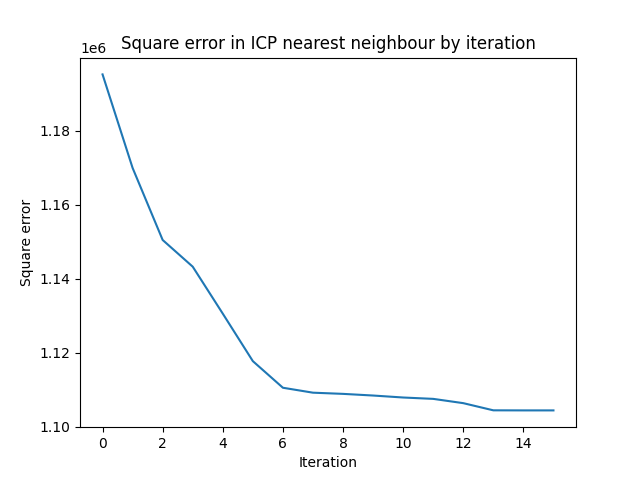

final transform:
 [[0.98515864 0.         0.        ]
 [0.         0.95582083 0.        ]
 [0.         0.         0.99874192]]
First transform:  [[1.01440162 0.         0.        ]
 [0.         1.01440162 0.        ]
 [0.         0.         1.01440162]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


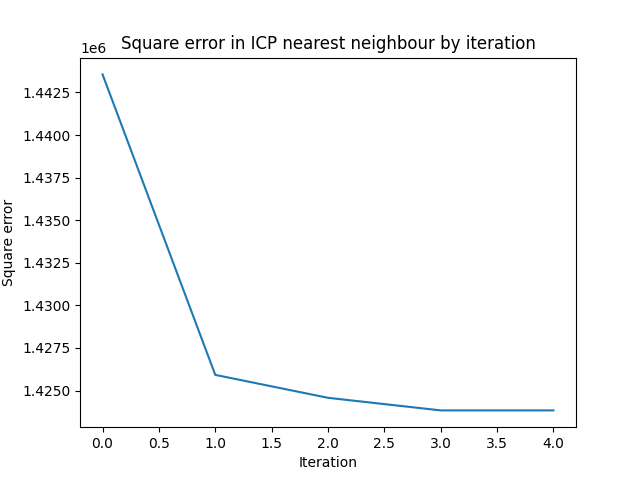

final transform:
 [[1.00421236 0.         0.        ]
 [0.         1.00621039 0.        ]
 [0.         0.         1.00075618]]
First transform:  [[0.99980446 0.         0.        ]
 [0.         0.99980446 0.        ]
 [0.         0.         0.99980446]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


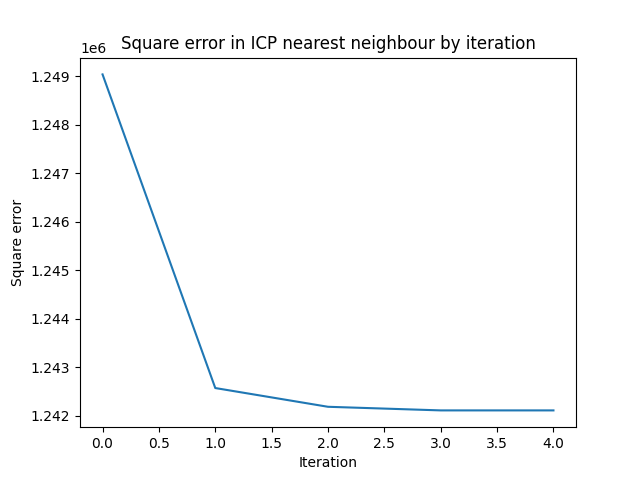

final transform:
 [[1.00372626 0.         0.        ]
 [0.         1.00186795 0.        ]
 [0.         0.         1.01808088]]


 <ipython-input-7-fc972adf82d9>:3: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


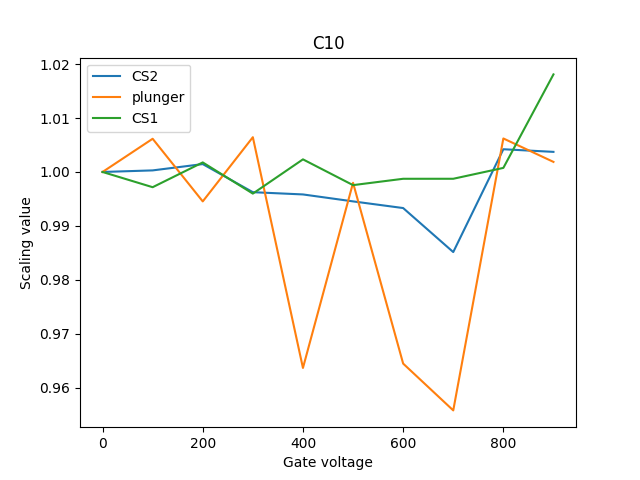

In [10]:
plot_gate("c10", voltages)

16
First transform:  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


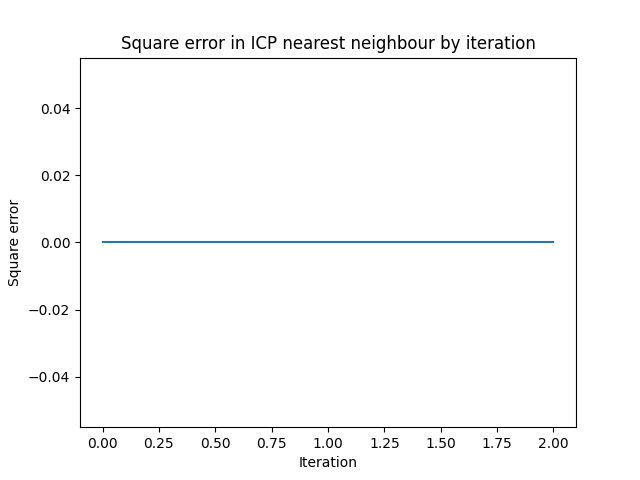

final transform:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
First transform:  [[1.00119145 0.         0.        ]
 [0.         1.00119145 0.        ]
 [0.         0.         1.00119145]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


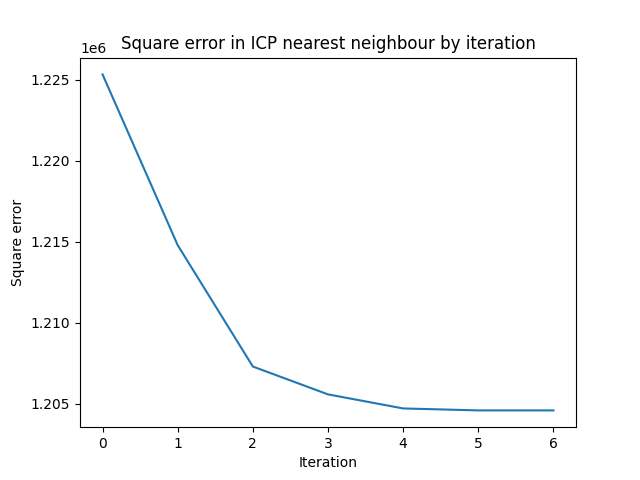

final transform:
 [[1.00543971 0.         0.        ]
 [0.         0.98632421 0.        ]
 [0.         0.         1.00118272]]
First transform:  [[0.98407832 0.         0.        ]
 [0.         0.98407832 0.        ]
 [0.         0.         0.98407832]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


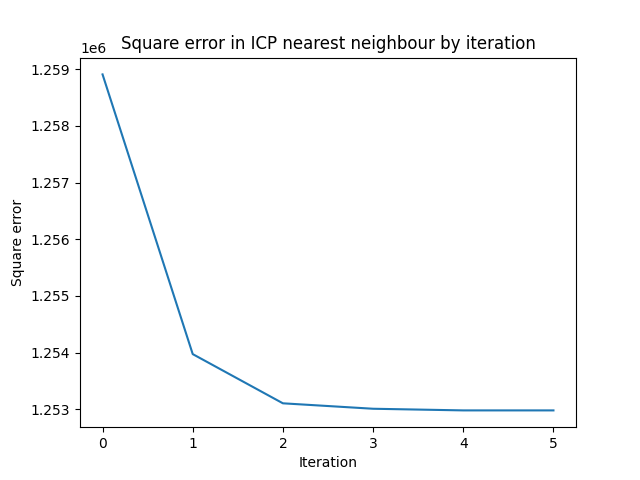

final transform:
 [[0.99366119 0.         0.        ]
 [0.         0.97794021 0.        ]
 [0.         0.         0.9969597 ]]
First transform:  [[0.99225725 0.         0.        ]
 [0.         0.99225725 0.        ]
 [0.         0.         0.99225725]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


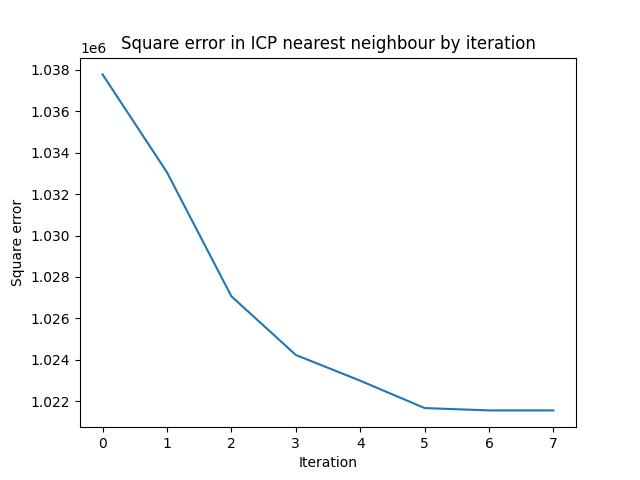

final transform:
 [[1.00009756 0.         0.        ]
 [0.         0.97782489 0.        ]
 [0.         0.         1.0000636 ]]
First transform:  [[0.98338628 0.         0.        ]
 [0.         0.98338628 0.        ]
 [0.         0.         0.98338628]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


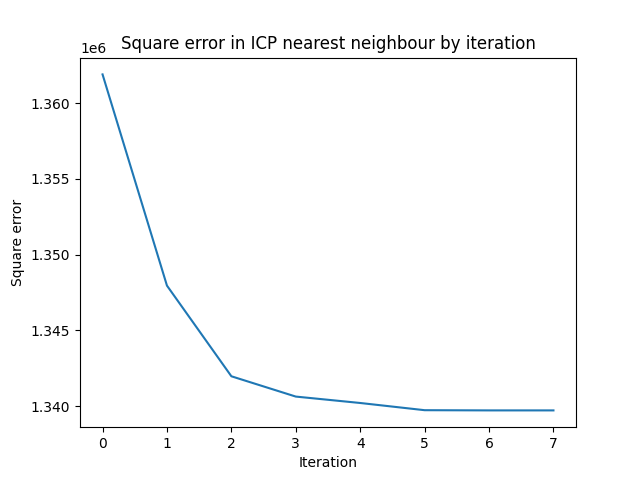

final transform:
 [[0.9951148  0.         0.        ]
 [0.         0.97026505 0.        ]
 [0.         0.         0.99832983]]
First transform:  [[1.00005591 0.         0.        ]
 [0.         1.00005591 0.        ]
 [0.         0.         1.00005591]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


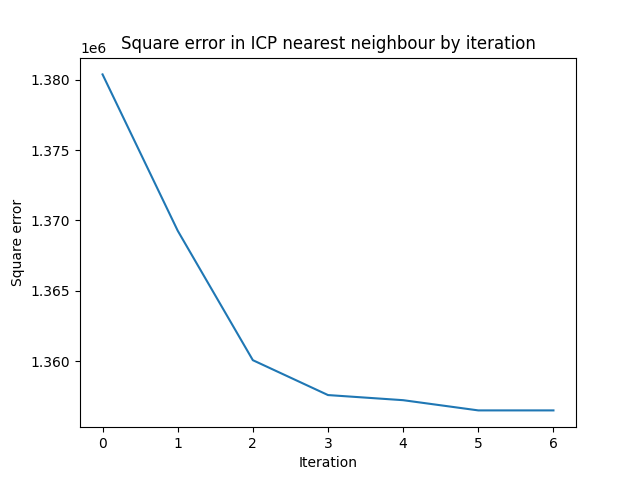

final transform:
 [[0.99426958 0.         0.        ]
 [0.         1.01536884 0.        ]
 [0.         0.         1.00738272]]
First transform:  [[0.99097765 0.         0.        ]
 [0.         0.99097765 0.        ]
 [0.         0.         0.99097765]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


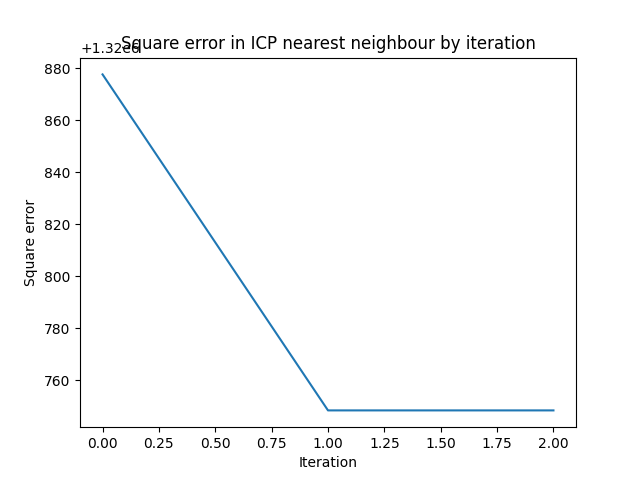

final transform:
 [[0.99650976 0.         0.        ]
 [0.         0.99259811 0.        ]
 [0.         0.         0.994528  ]]
First transform:  [[0.99542658 0.         0.        ]
 [0.         0.99542658 0.        ]
 [0.         0.         0.99542658]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


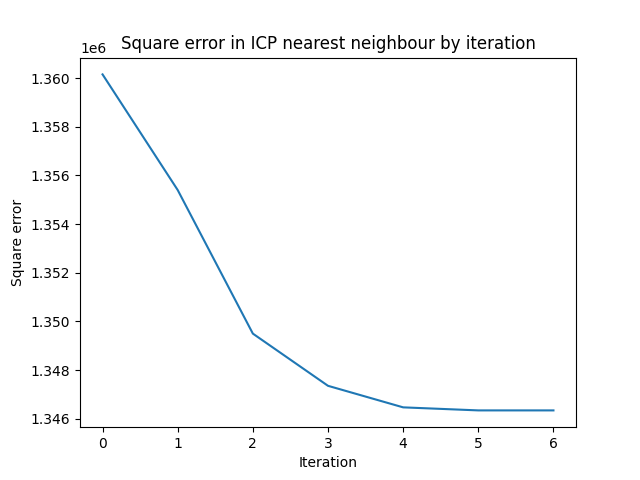

final transform:
 [[0.99422617 0.         0.        ]
 [0.         0.98285671 0.        ]
 [0.         0.         0.99864011]]
First transform:  [[0.98888207 0.         0.        ]
 [0.         0.98888207 0.        ]
 [0.         0.         0.98888207]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


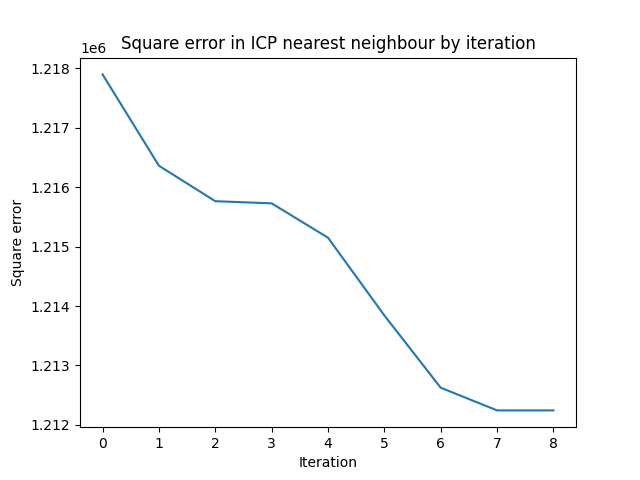

final transform:
 [[0.99487911 0.         0.        ]
 [0.         0.99790472 0.        ]
 [0.         0.         0.99010084]]
First transform:  [[0.97881931 0.         0.        ]
 [0.         0.97881931 0.        ]
 [0.         0.         0.97881931]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


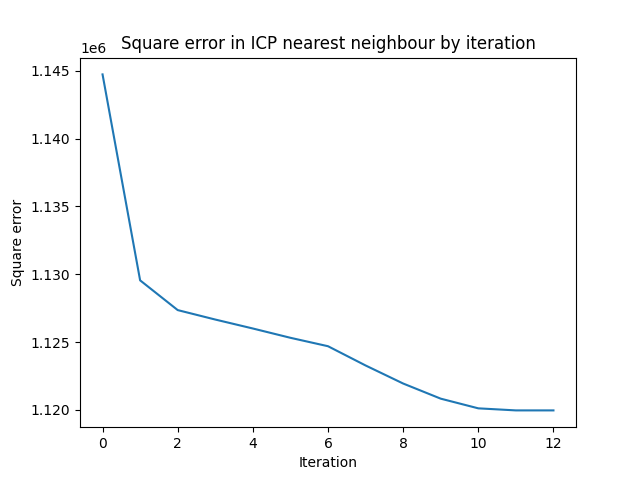

final transform:
 [[0.98492404 0.         0.        ]
 [0.         0.99660407 0.        ]
 [0.         0.         1.00063691]]
First transform:  [[0.9834956 0.        0.       ]
 [0.        0.9834956 0.       ]
 [0.        0.        0.9834956]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


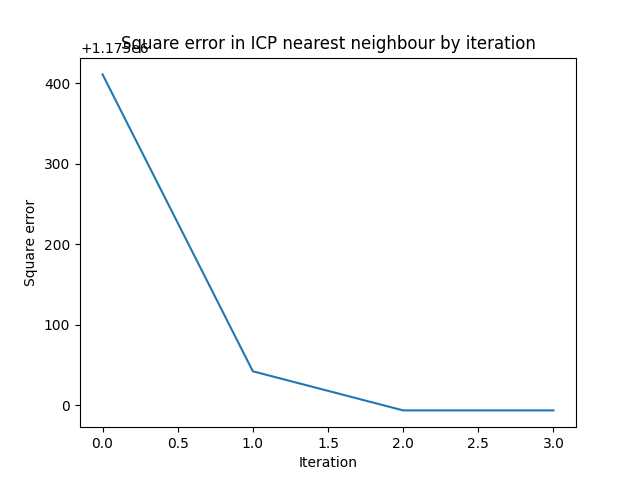

final transform:
 [[0.98661812 0.         0.        ]
 [0.         0.9839336  0.        ]
 [0.         0.         0.99070315]]
First transform:  [[1.00303341 0.         0.        ]
 [0.         1.00303341 0.        ]
 [0.         0.         1.00303341]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


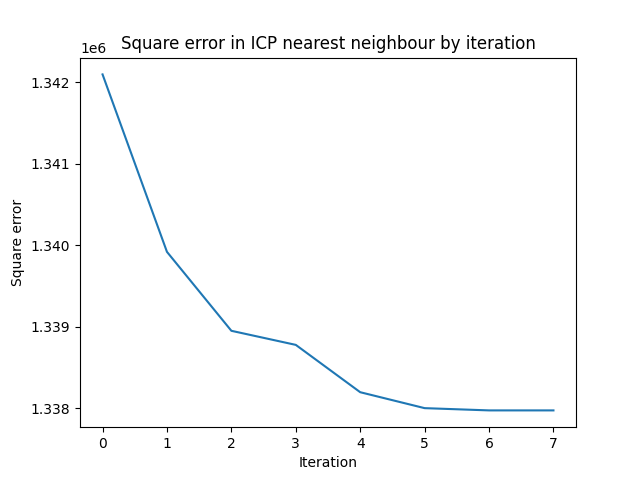

final transform:
 [[0.99032497 0.         0.        ]
 [0.         1.0090865  0.        ]
 [0.         0.         0.99425028]]
First transform:  [[0.9855549 0.        0.       ]
 [0.        0.9855549 0.       ]
 [0.        0.        0.9855549]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


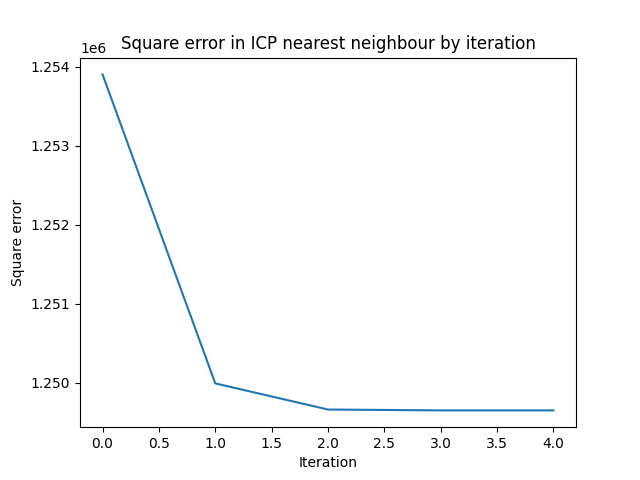

final transform:
 [[0.98552045 0.         0.        ]
 [0.         0.97934729 0.        ]
 [0.         0.         0.99622498]]
First transform:  [[0.99562165 0.         0.        ]
 [0.         0.99562165 0.        ]
 [0.         0.         0.99562165]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


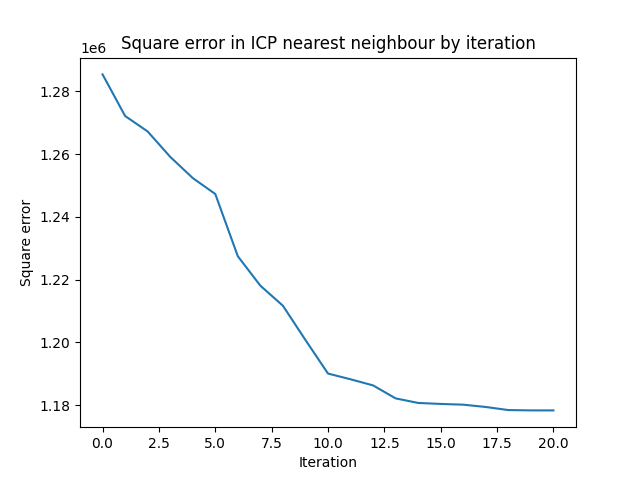

final transform:
 [[0.99080895 0.         0.        ]
 [0.         0.94181468 0.        ]
 [0.         0.         1.00006107]]
First transform:  [[0.9786651 0.        0.       ]
 [0.        0.9786651 0.       ]
 [0.        0.        0.9786651]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


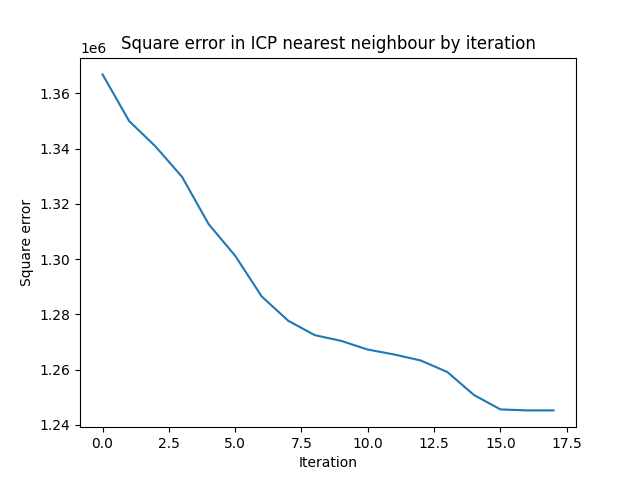

final transform:
 [[0.98658335 0.         0.        ]
 [0.         0.91856704 0.        ]
 [0.         0.         0.99400112]]
First transform:  [[0.97898803 0.         0.        ]
 [0.         0.97898803 0.        ]
 [0.         0.         0.97898803]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


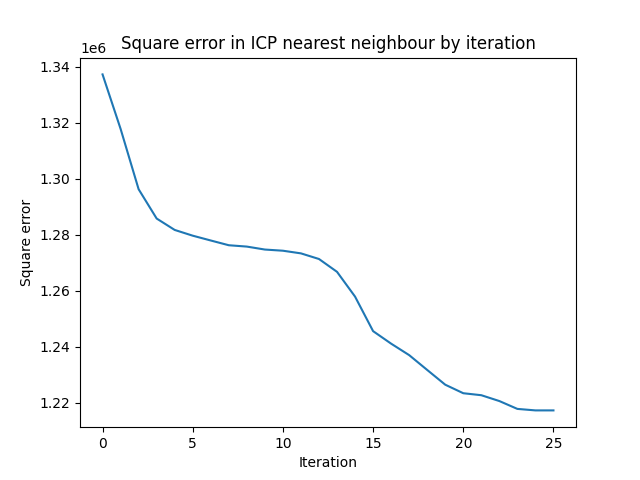

final transform:
 [[0.98335854 0.         0.        ]
 [0.         0.91418357 0.        ]
 [0.         0.         0.99222409]]


 <ipython-input-7-fc972adf82d9>:3: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


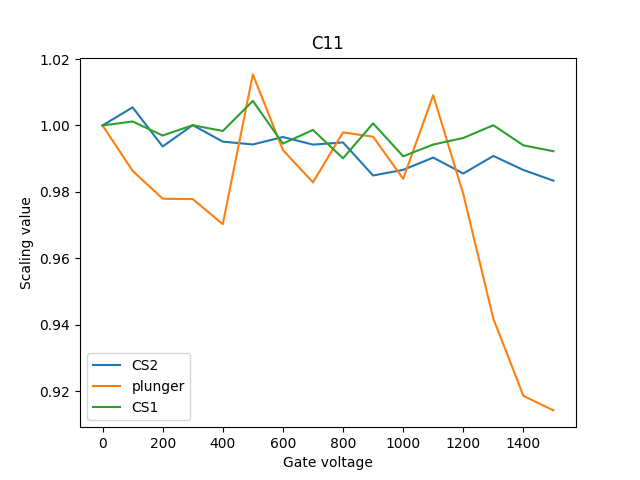

In [11]:
plot_gate("c11", voltages)

11
First transform:  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


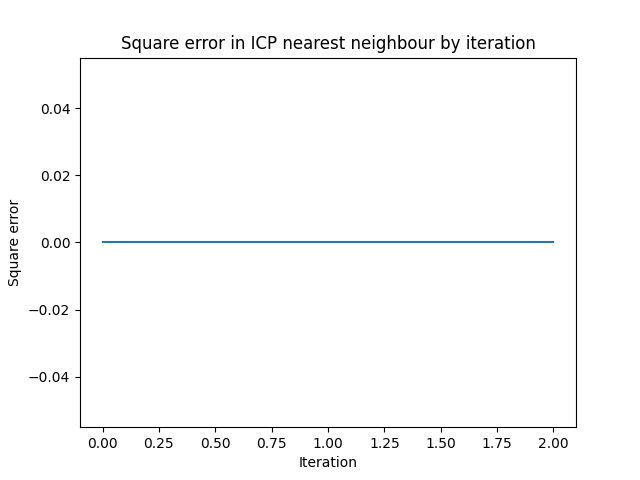

final transform:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
First transform:  [[0.97684501 0.         0.        ]
 [0.         0.97684501 0.        ]
 [0.         0.         0.97684501]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


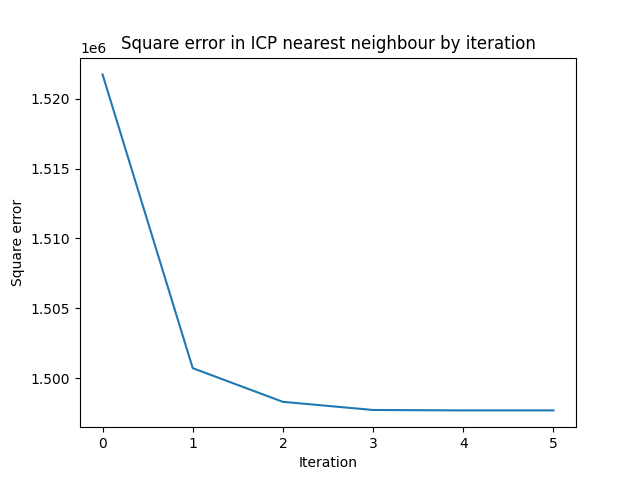

final transform:
 [[0.99934606 0.         0.        ]
 [0.         0.97822282 0.        ]
 [0.         0.         1.00033059]]
First transform:  [[0.99685272 0.         0.        ]
 [0.         0.99685272 0.        ]
 [0.         0.         0.99685272]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


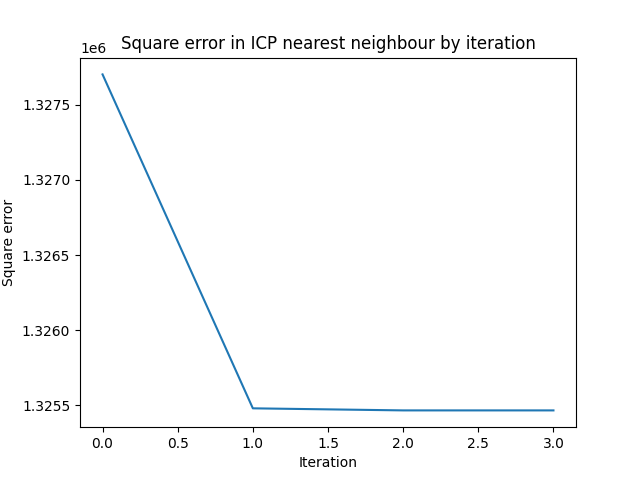

final transform:
 [[0.99954308 0.         0.        ]
 [0.         0.99412627 0.        ]
 [0.         0.         1.00205955]]
First transform:  [[0.99292302 0.         0.        ]
 [0.         0.99292302 0.        ]
 [0.         0.         0.99292302]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


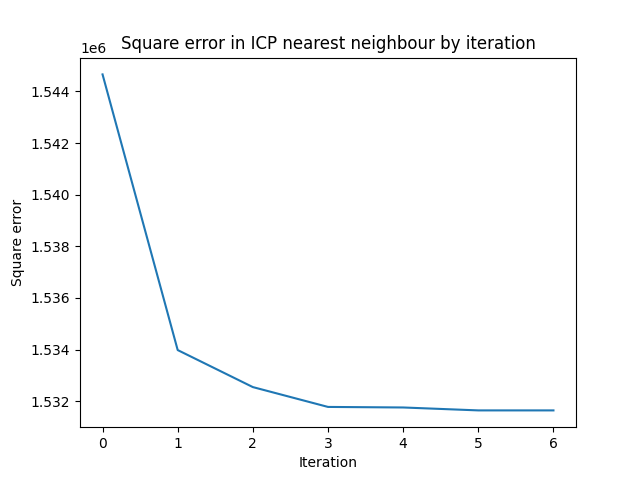

final transform:
 [[1.00719245 0.         0.        ]
 [0.         0.98499095 0.        ]
 [0.         0.         1.00346716]]
First transform:  [[0.99687305 0.         0.        ]
 [0.         0.99687305 0.        ]
 [0.         0.         0.99687305]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


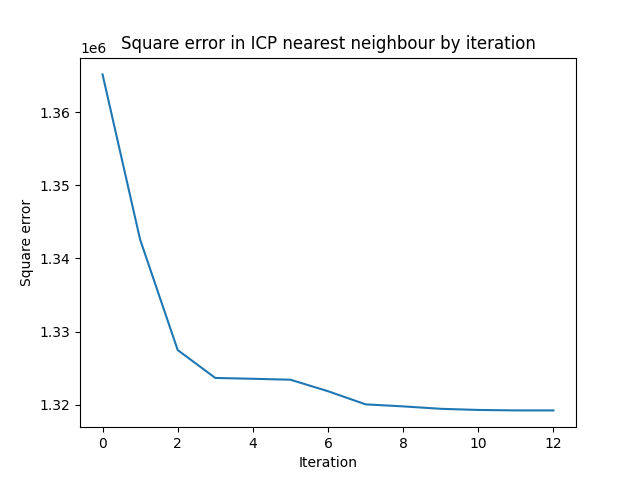

final transform:
 [[1.00838918 0.         0.        ]
 [0.         0.97379182 0.        ]
 [0.         0.         0.99766849]]
First transform:  [[0.99280408 0.         0.        ]
 [0.         0.99280408 0.        ]
 [0.         0.         0.99280408]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


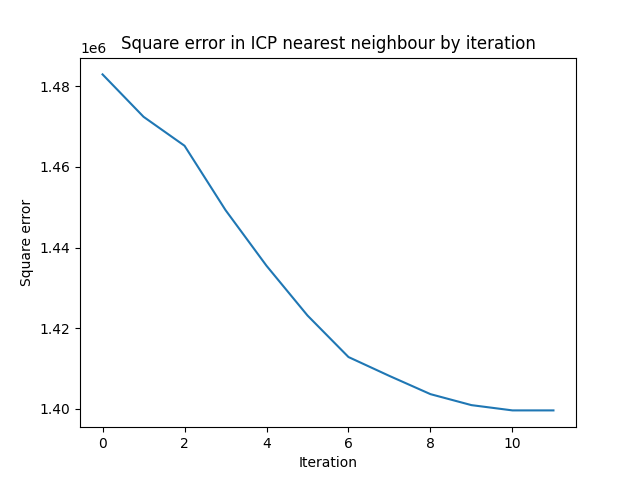

final transform:
 [[1.00686728 0.         0.        ]
 [0.         1.02726802 0.        ]
 [0.         0.         1.00656912]]
First transform:  [[0.99727346 0.         0.        ]
 [0.         0.99727346 0.        ]
 [0.         0.         0.99727346]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


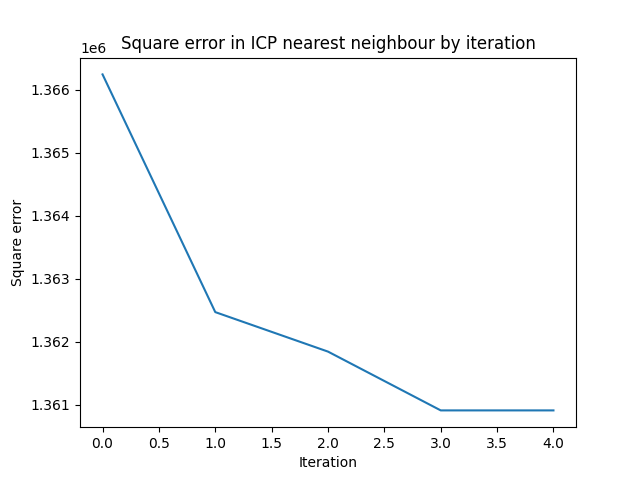

final transform:
 [[1.00381817 0.         0.        ]
 [0.         0.99205011 0.        ]
 [0.         0.         1.00761578]]
First transform:  [[0.99935443 0.         0.        ]
 [0.         0.99935443 0.        ]
 [0.         0.         0.99935443]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


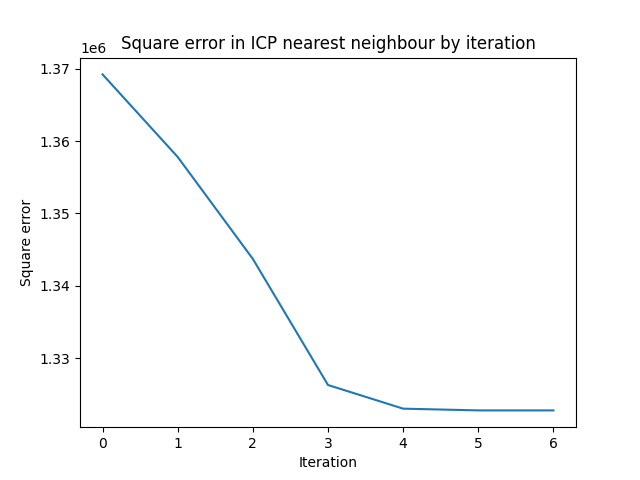

final transform:
 [[0.99905512 0.         0.        ]
 [0.         0.97660234 0.        ]
 [0.         0.         1.00357253]]
First transform:  [[0.98743375 0.         0.        ]
 [0.         0.98743375 0.        ]
 [0.         0.         0.98743375]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


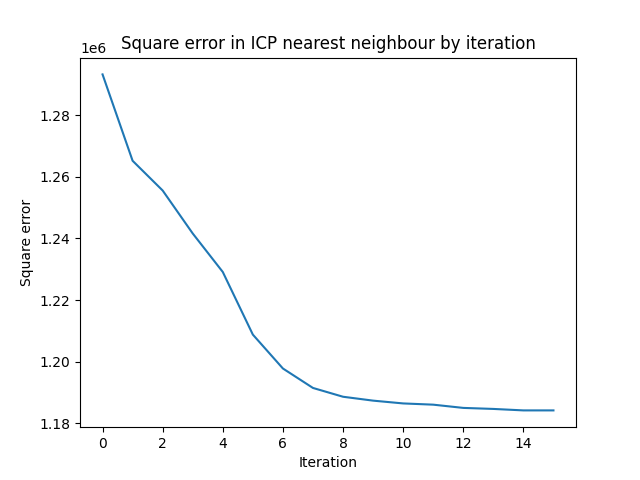

final transform:
 [[1.00302529 0.         0.        ]
 [0.         0.94112355 0.        ]
 [0.         0.         0.9991418 ]]
First transform:  [[1.00376802 0.         0.        ]
 [0.         1.00376802 0.        ]
 [0.         0.         1.00376802]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


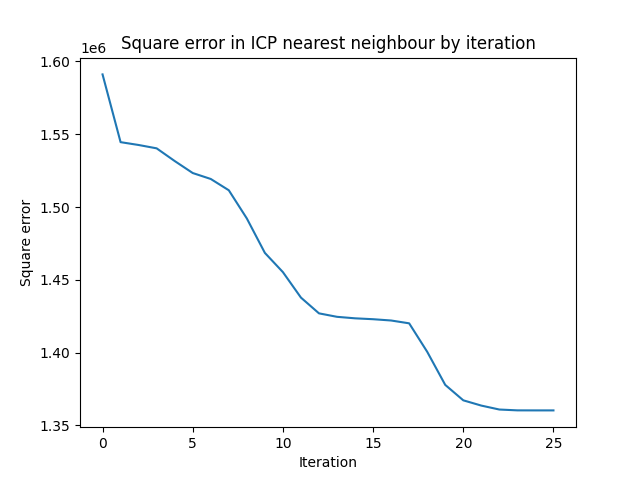

final transform:
 [[1.03207289 0.         0.        ]
 [0.         0.92595307 0.        ]
 [0.         0.         1.03506865]]
First transform:  [[0.99344684 0.         0.        ]
 [0.         0.99344684 0.        ]
 [0.         0.         0.99344684]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


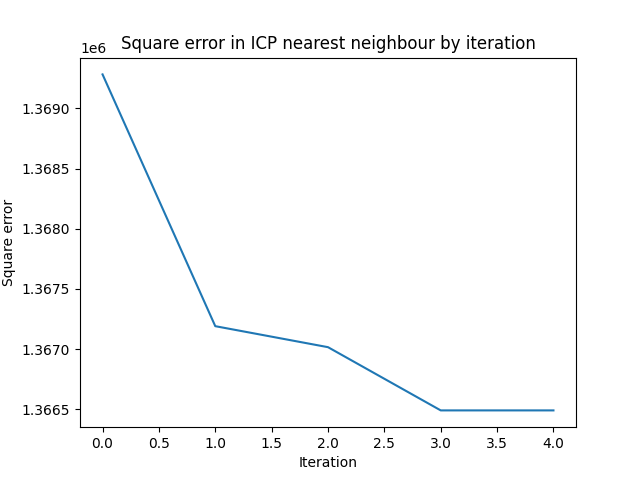

final transform:
 [[0.99408227 0.         0.        ]
 [0.         0.99326483 0.        ]
 [0.         0.         1.00392851]]
16
First transform:  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


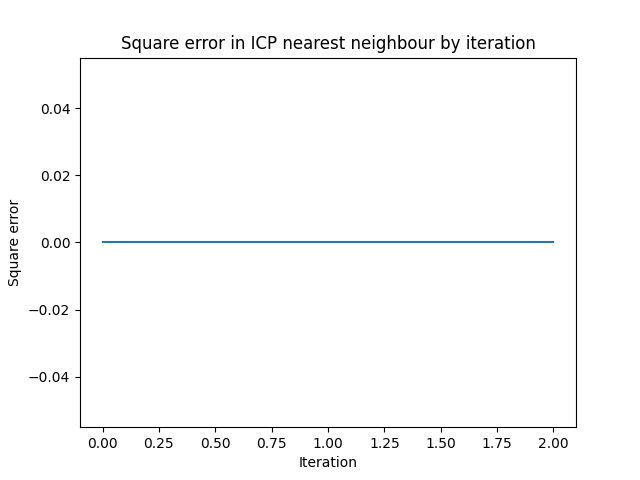

final transform:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
First transform:  [[0.98890642 0.         0.        ]
 [0.         0.98890642 0.        ]
 [0.         0.         0.98890642]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


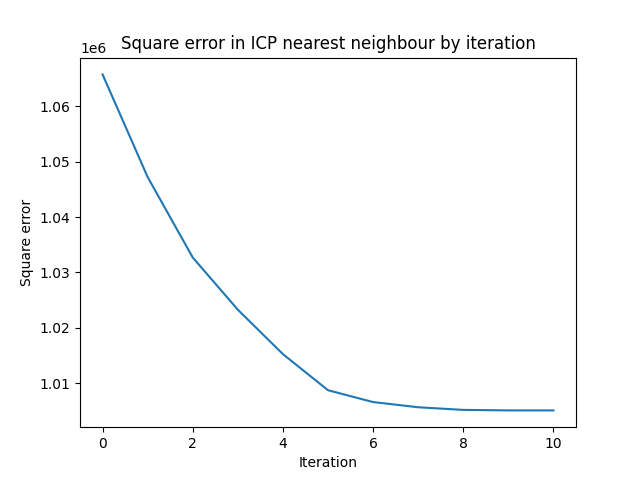

final transform:
 [[1.00155522 0.         0.        ]
 [0.         0.96131002 0.        ]
 [0.         0.         0.99459577]]
First transform:  [[1.00145187 0.         0.        ]
 [0.         1.00145187 0.        ]
 [0.         0.         1.00145187]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


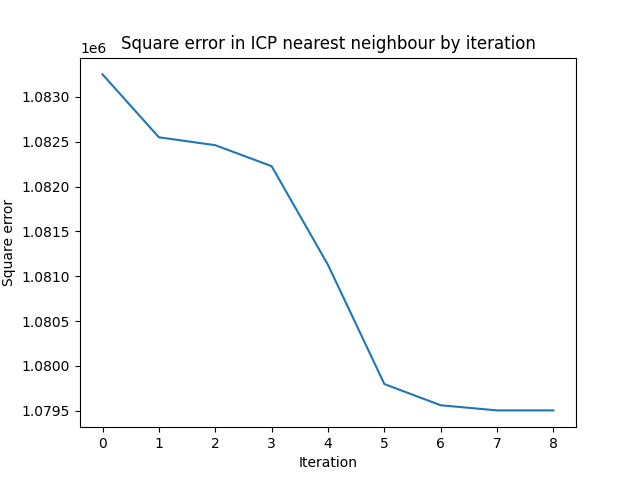

final transform:
 [[1.00105312 0.         0.        ]
 [0.         1.00767203 0.        ]
 [0.         0.         0.99355903]]
First transform:  [[0.99567986 0.         0.        ]
 [0.         0.99567986 0.        ]
 [0.         0.         0.99567986]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


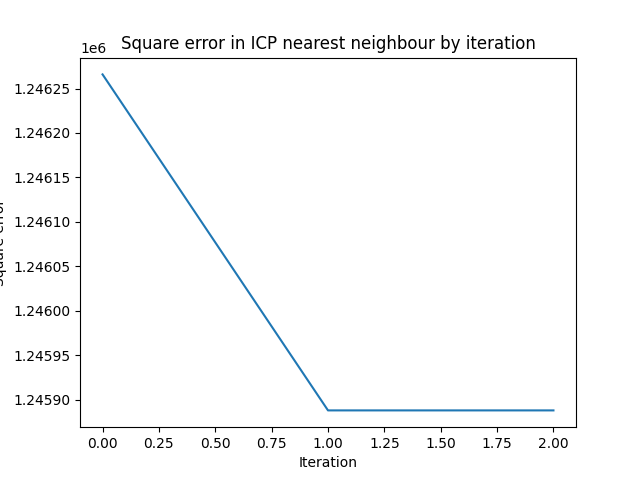

final transform:
 [[0.99942144 0.         0.        ]
 [0.         0.99714135 0.        ]
 [0.         0.         0.99504337]]
First transform:  [[0.99636014 0.         0.        ]
 [0.         0.99636014 0.        ]
 [0.         0.         0.99636014]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


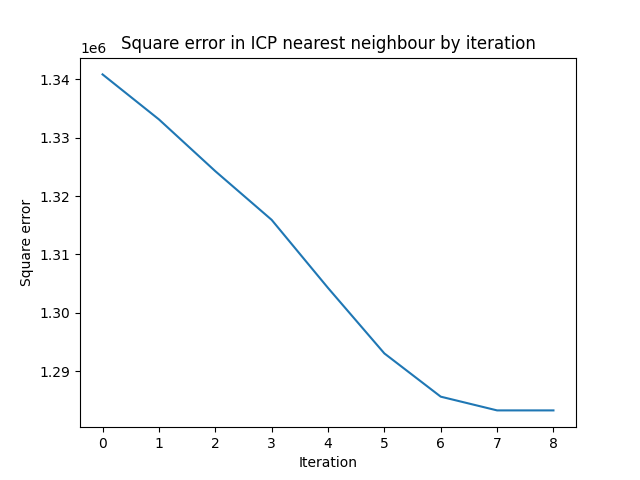

final transform:
 [[1.00243085 0.         0.        ]
 [0.         0.96836493 0.        ]
 [0.         0.         0.99564682]]
First transform:  [[0.99939509 0.         0.        ]
 [0.         0.99939509 0.        ]
 [0.         0.         0.99939509]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


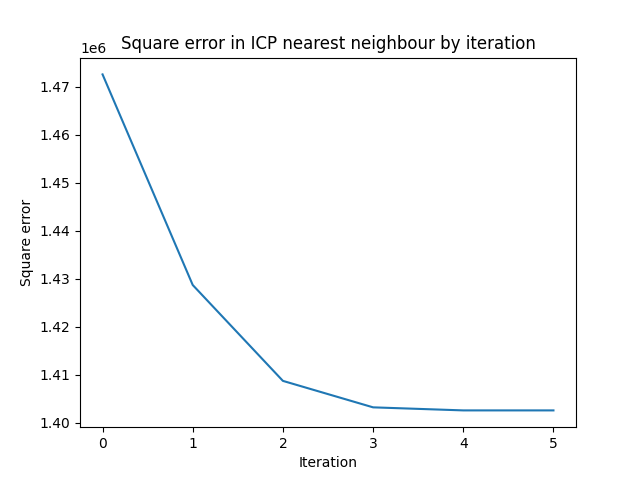

final transform:
 [[0.99828174 0.         0.        ]
 [0.         0.97355968 0.        ]
 [0.         0.         0.99522869]]
First transform:  [[0.99328145 0.         0.        ]
 [0.         0.99328145 0.        ]
 [0.         0.         0.99328145]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


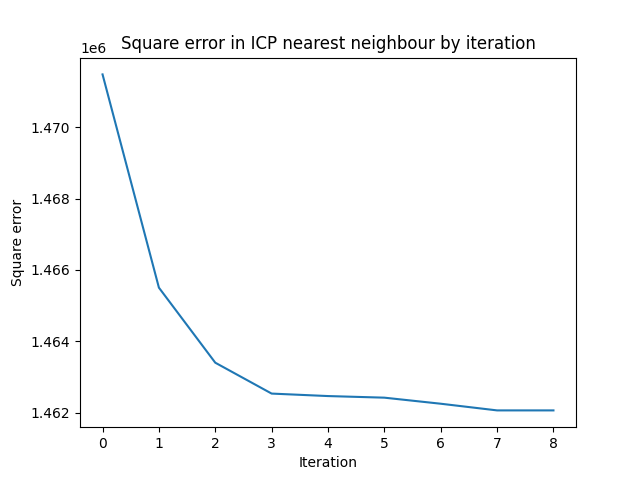

final transform:
 [[0.99435682 0.         0.        ]
 [0.         1.00325742 0.        ]
 [0.         0.         1.00089594]]
First transform:  [[0.99257124 0.         0.        ]
 [0.         0.99257124 0.        ]
 [0.         0.         0.99257124]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


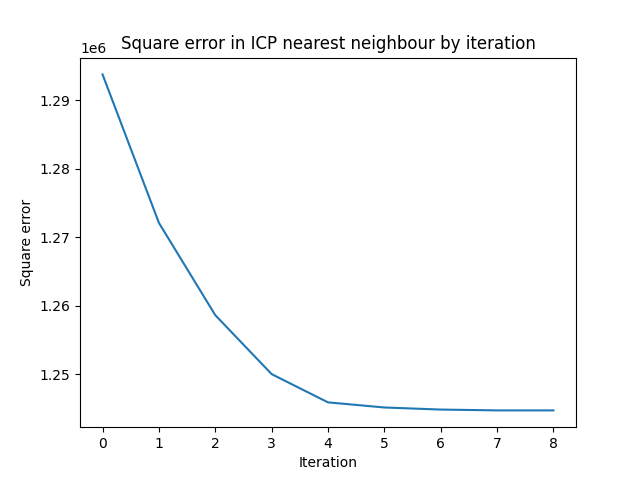

final transform:
 [[0.99524227 0.         0.        ]
 [0.         0.96889274 0.        ]
 [0.         0.         1.00032124]]
First transform:  [[1.00564332 0.         0.        ]
 [0.         1.00564332 0.        ]
 [0.         0.         1.00564332]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


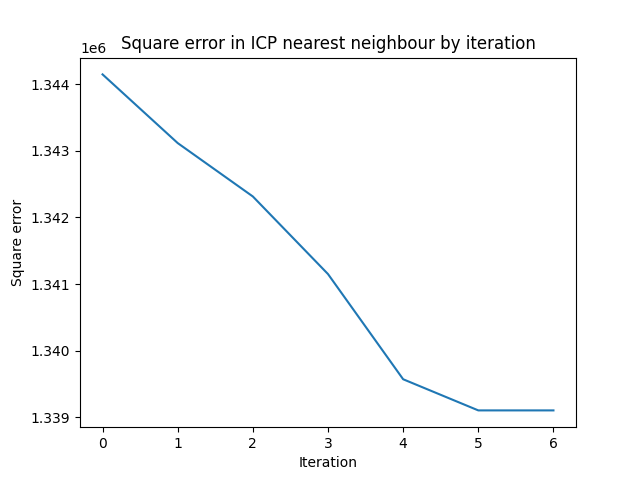

final transform:
 [[1.00453032 0.         0.        ]
 [0.         0.99664746 0.        ]
 [0.         0.         0.99661275]]
First transform:  [[0.99284661 0.         0.        ]
 [0.         0.99284661 0.        ]
 [0.         0.         0.99284661]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


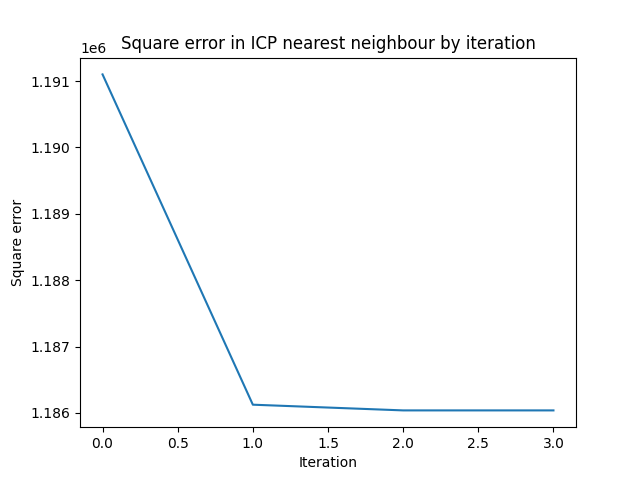

final transform:
 [[0.99366017 0.         0.        ]
 [0.         0.98577884 0.        ]
 [0.         0.         0.99571992]]
First transform:  [[0.98547212 0.         0.        ]
 [0.         0.98547212 0.        ]
 [0.         0.         0.98547212]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


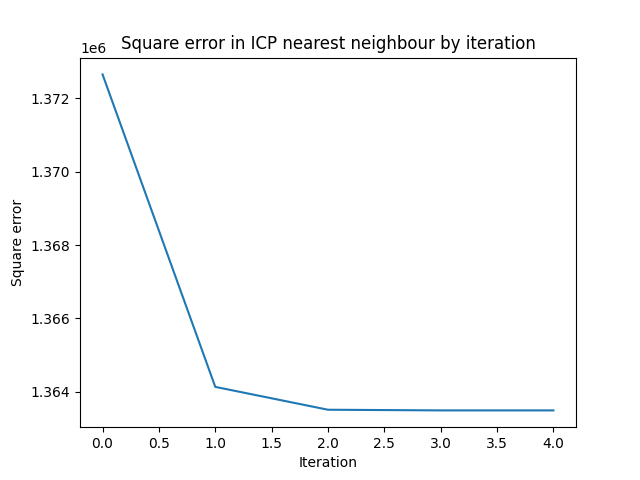

final transform:
 [[0.99495243 0.         0.        ]
 [0.         0.98841547 0.        ]
 [0.         0.         0.99847532]]
First transform:  [[0.98943817 0.         0.        ]
 [0.         0.98943817 0.        ]
 [0.         0.         0.98943817]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


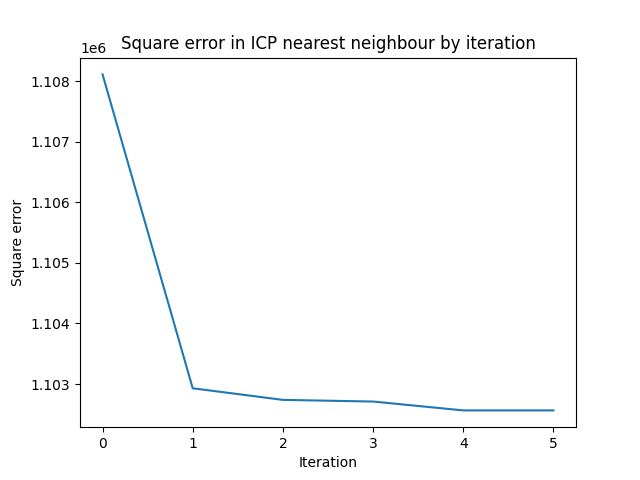

final transform:
 [[0.99590354 0.         0.        ]
 [0.         0.98027711 0.        ]
 [0.         0.         0.99209089]]
First transform:  [[0.98184264 0.         0.        ]
 [0.         0.98184264 0.        ]
 [0.         0.         0.98184264]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


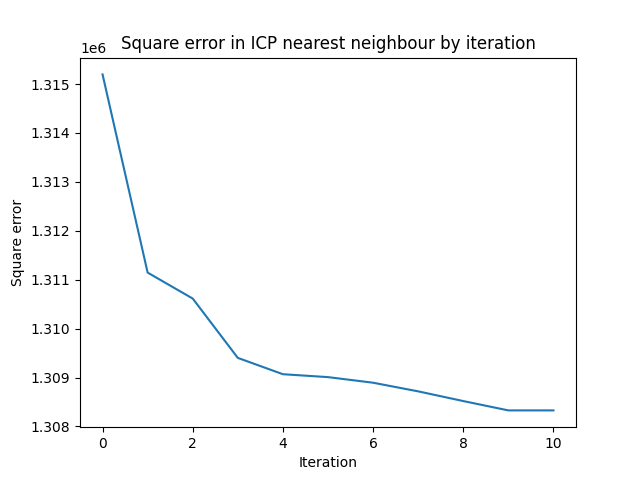

final transform:
 [[0.99498826 0.         0.        ]
 [0.         0.97480503 0.        ]
 [0.         0.         0.99185778]]
First transform:  [[0.99448496 0.         0.        ]
 [0.         0.99448496 0.        ]
 [0.         0.         0.99448496]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


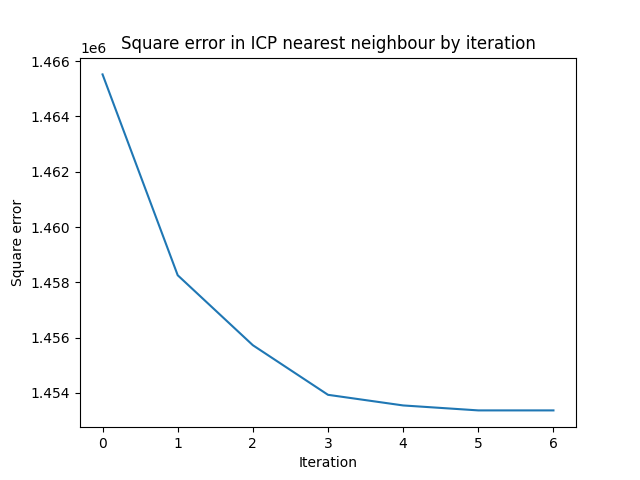

final transform:
 [[0.99473558 0.         0.        ]
 [0.         0.98298547 0.        ]
 [0.         0.         0.99132902]]
First transform:  [[0.97813128 0.         0.        ]
 [0.         0.97813128 0.        ]
 [0.         0.         0.97813128]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


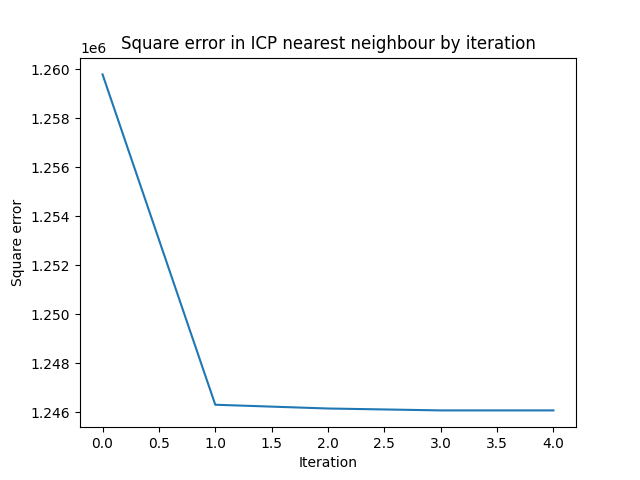

final transform:
 [[0.9927306  0.         0.        ]
 [0.         0.97761256 0.        ]
 [0.         0.         0.99553259]]
First transform:  [[0.99598085 0.         0.        ]
 [0.         0.99598085 0.        ]
 [0.         0.         0.99598085]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


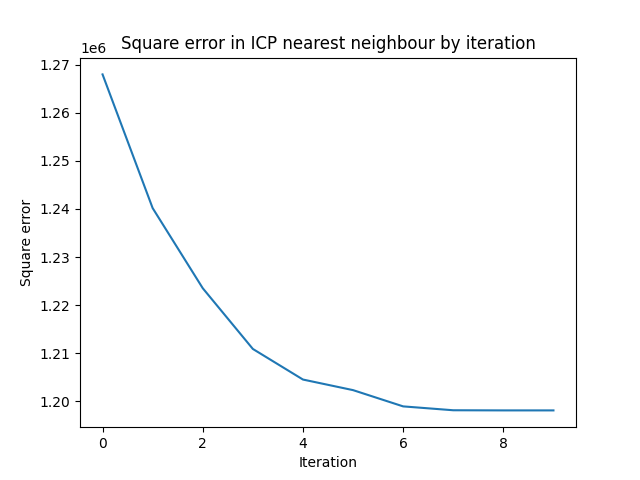

final transform:
 [[0.988164   0.         0.        ]
 [0.         0.96565395 0.        ]
 [0.         0.         0.99860229]]
10
First transform:  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


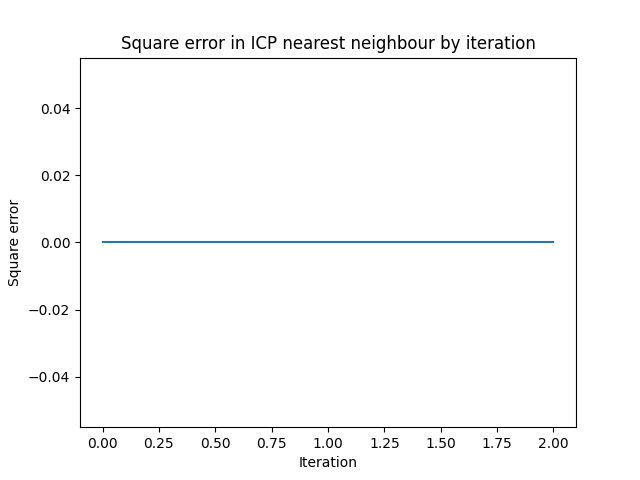

final transform:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
First transform:  [[1.00245076 0.         0.        ]
 [0.         1.00245076 0.        ]
 [0.         0.         1.00245076]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


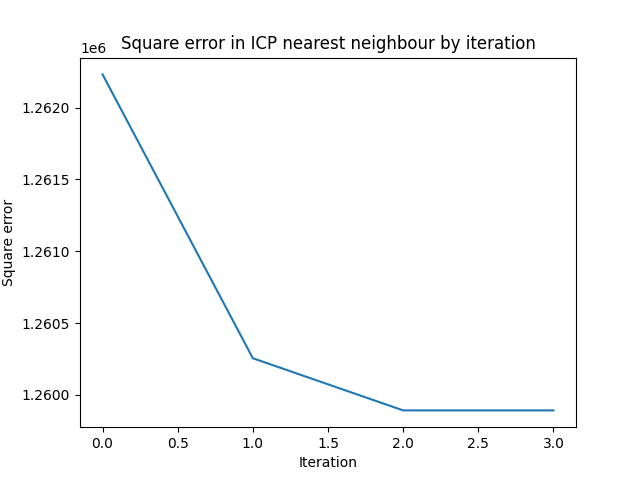

final transform:
 [[1.00029243 0.         0.        ]
 [0.         1.00615277 0.        ]
 [0.         0.         0.99717803]]
First transform:  [[0.99748514 0.         0.        ]
 [0.         0.99748514 0.        ]
 [0.         0.         0.99748514]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


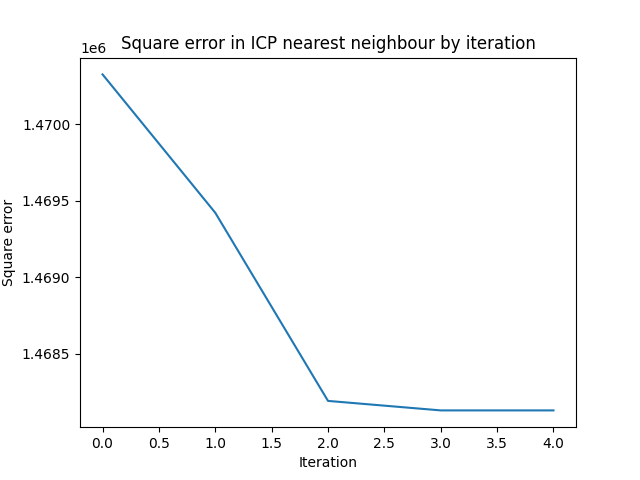

final transform:
 [[1.00146072 0.         0.        ]
 [0.         0.9945467  0.        ]
 [0.         0.         1.00177106]]
First transform:  [[0.99590292 0.         0.        ]
 [0.         0.99590292 0.        ]
 [0.         0.         0.99590292]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


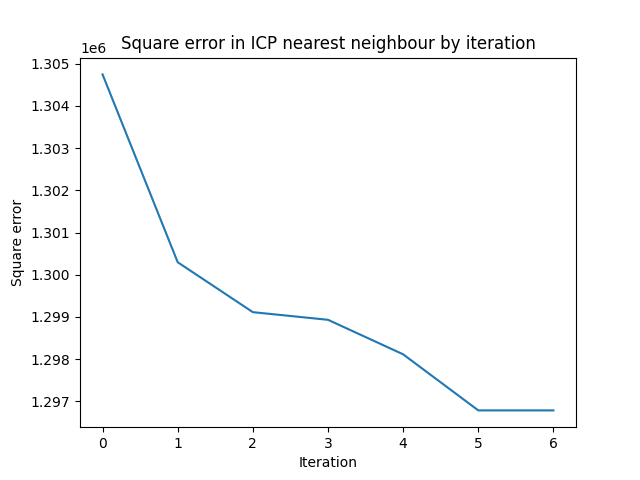

final transform:
 [[0.99625647 0.         0.        ]
 [0.         1.00644293 0.        ]
 [0.         0.         0.99599201]]
First transform:  [[0.9944331 0.        0.       ]
 [0.        0.9944331 0.       ]
 [0.        0.        0.9944331]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


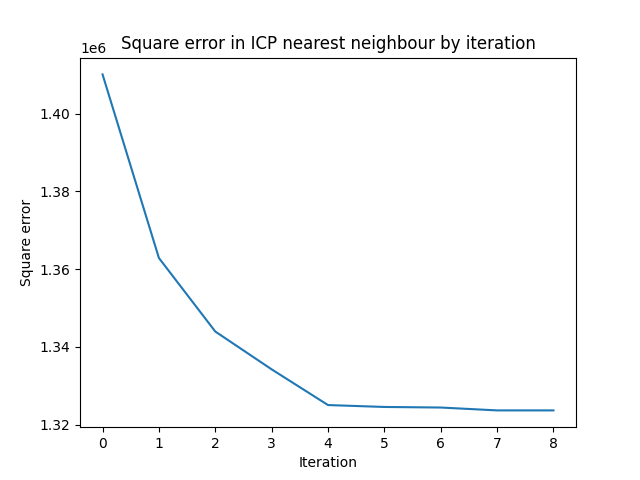

final transform:
 [[0.99583795 0.         0.        ]
 [0.         0.9636869  0.        ]
 [0.         0.         1.00233798]]
First transform:  [[0.99402087 0.         0.        ]
 [0.         0.99402087 0.        ]
 [0.         0.         0.99402087]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


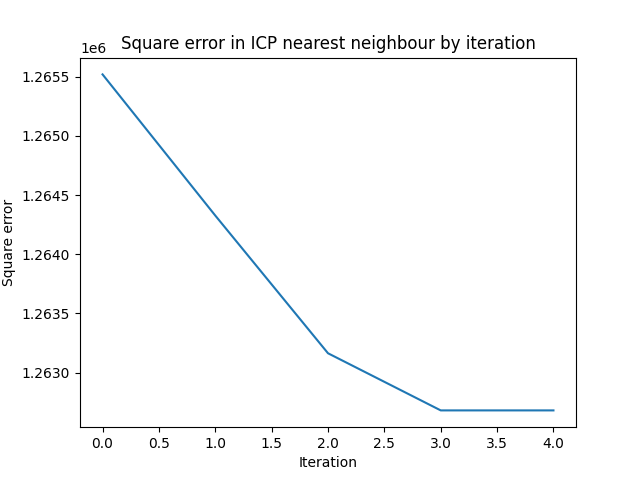

final transform:
 [[0.99455047 0.         0.        ]
 [0.         0.99799298 0.        ]
 [0.         0.         0.99756345]]
First transform:  [[0.98281808 0.         0.        ]
 [0.         0.98281808 0.        ]
 [0.         0.         0.98281808]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


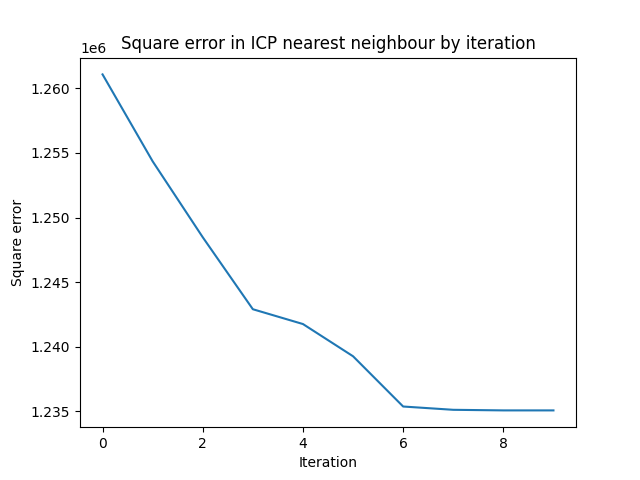

final transform:
 [[0.99331559 0.         0.        ]
 [0.         0.96449455 0.        ]
 [0.         0.         0.99873908]]
First transform:  [[0.99632646 0.         0.        ]
 [0.         0.99632646 0.        ]
 [0.         0.         0.99632646]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


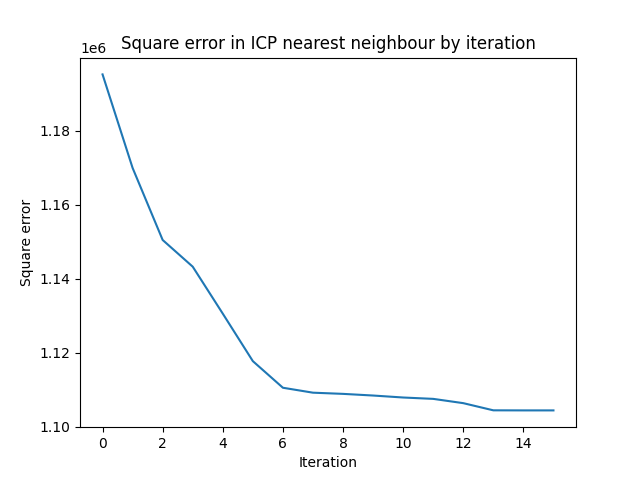

final transform:
 [[0.98515864 0.         0.        ]
 [0.         0.95582083 0.        ]
 [0.         0.         0.99874192]]
First transform:  [[1.01440162 0.         0.        ]
 [0.         1.01440162 0.        ]
 [0.         0.         1.01440162]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


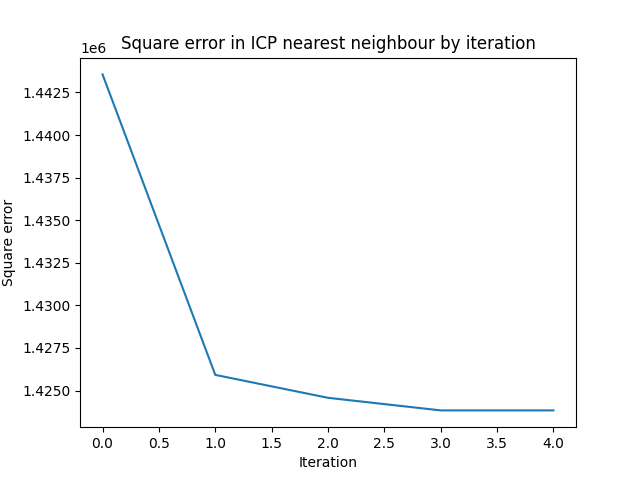

final transform:
 [[1.00421236 0.         0.        ]
 [0.         1.00621039 0.        ]
 [0.         0.         1.00075618]]
First transform:  [[0.99980446 0.         0.        ]
 [0.         0.99980446 0.        ]
 [0.         0.         0.99980446]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


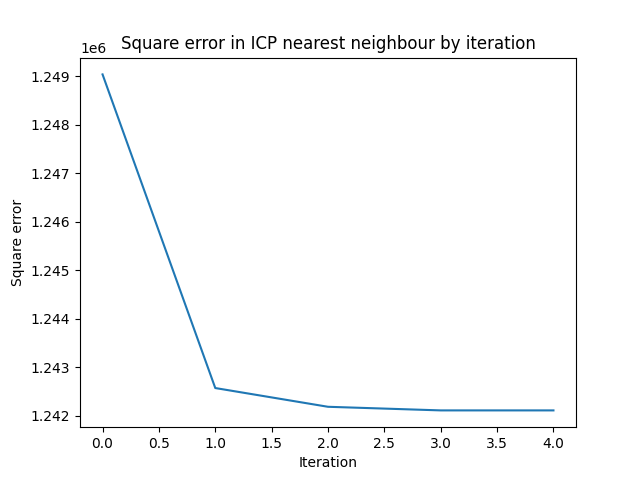

final transform:
 [[1.00372626 0.         0.        ]
 [0.         1.00186795 0.        ]
 [0.         0.         1.01808088]]
16
First transform:  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


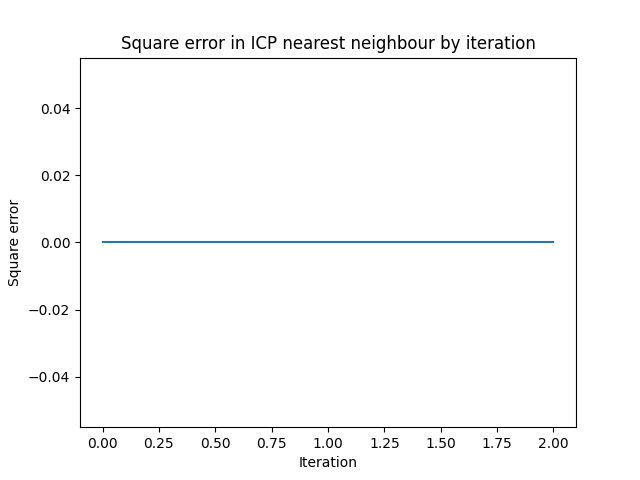

final transform:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
First transform:  [[1.00119145 0.         0.        ]
 [0.         1.00119145 0.        ]
 [0.         0.         1.00119145]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


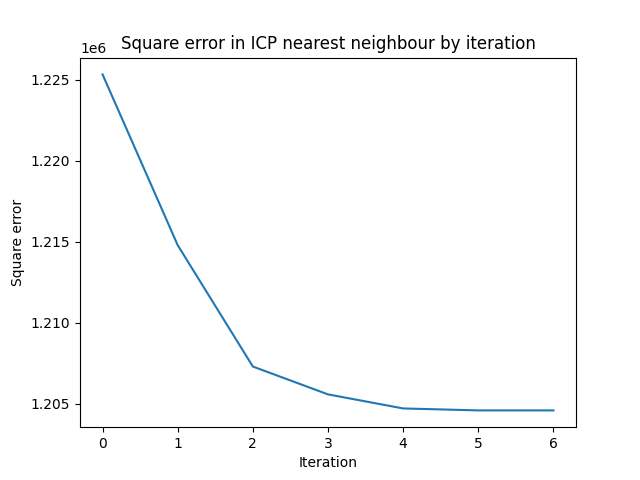

final transform:
 [[1.00543971 0.         0.        ]
 [0.         0.98632421 0.        ]
 [0.         0.         1.00118272]]
First transform:  [[0.98407832 0.         0.        ]
 [0.         0.98407832 0.        ]
 [0.         0.         0.98407832]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


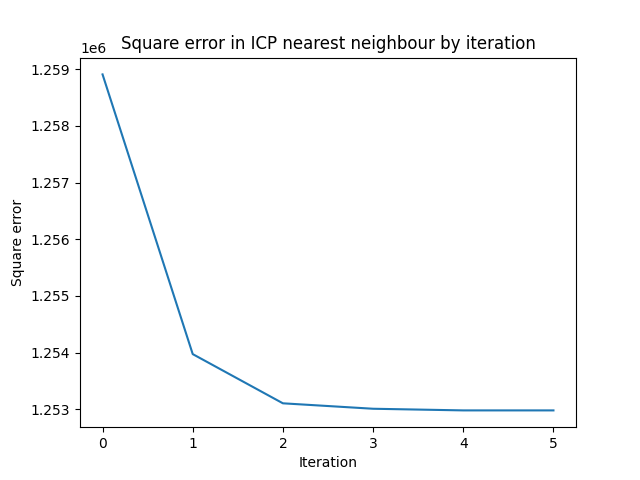

final transform:
 [[0.99366119 0.         0.        ]
 [0.         0.97794021 0.        ]
 [0.         0.         0.9969597 ]]
First transform:  [[0.99225725 0.         0.        ]
 [0.         0.99225725 0.        ]
 [0.         0.         0.99225725]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


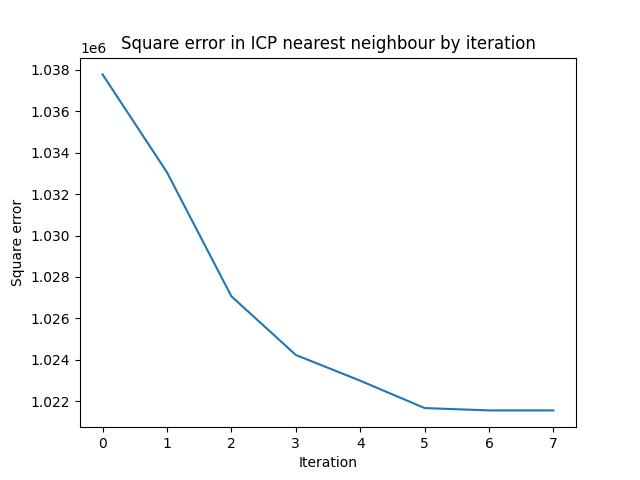

final transform:
 [[1.00009756 0.         0.        ]
 [0.         0.97782489 0.        ]
 [0.         0.         1.0000636 ]]
First transform:  [[0.98338628 0.         0.        ]
 [0.         0.98338628 0.        ]
 [0.         0.         0.98338628]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


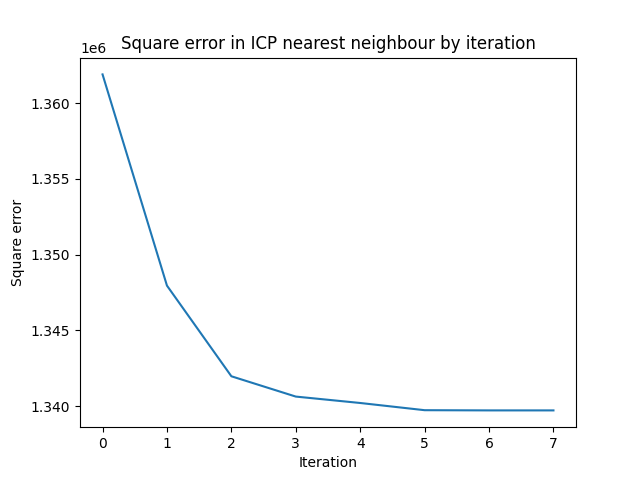

final transform:
 [[0.9951148  0.         0.        ]
 [0.         0.97026505 0.        ]
 [0.         0.         0.99832983]]
First transform:  [[1.00005591 0.         0.        ]
 [0.         1.00005591 0.        ]
 [0.         0.         1.00005591]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


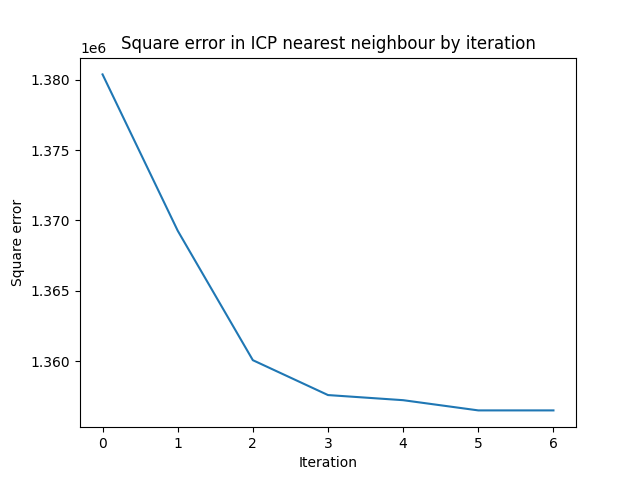

final transform:
 [[0.99426958 0.         0.        ]
 [0.         1.01536884 0.        ]
 [0.         0.         1.00738272]]
First transform:  [[0.99097765 0.         0.        ]
 [0.         0.99097765 0.        ]
 [0.         0.         0.99097765]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


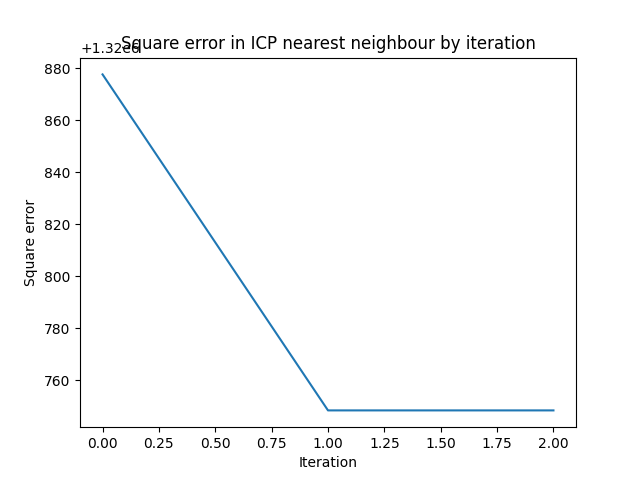

final transform:
 [[0.99650976 0.         0.        ]
 [0.         0.99259811 0.        ]
 [0.         0.         0.994528  ]]
First transform:  [[0.99542658 0.         0.        ]
 [0.         0.99542658 0.        ]
 [0.         0.         0.99542658]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


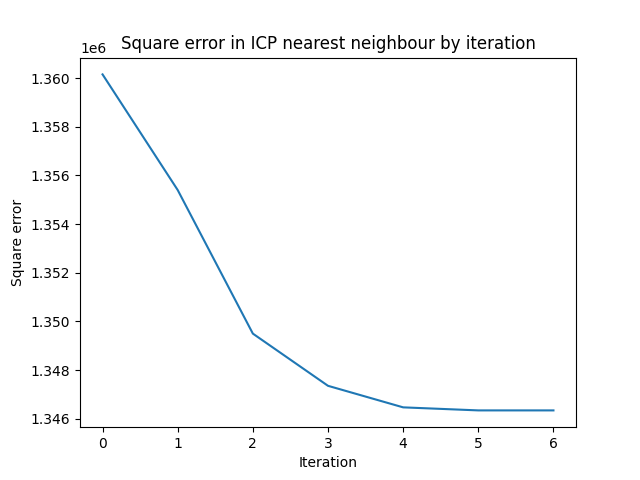

final transform:
 [[0.99422617 0.         0.        ]
 [0.         0.98285671 0.        ]
 [0.         0.         0.99864011]]
First transform:  [[0.98888207 0.         0.        ]
 [0.         0.98888207 0.        ]
 [0.         0.         0.98888207]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


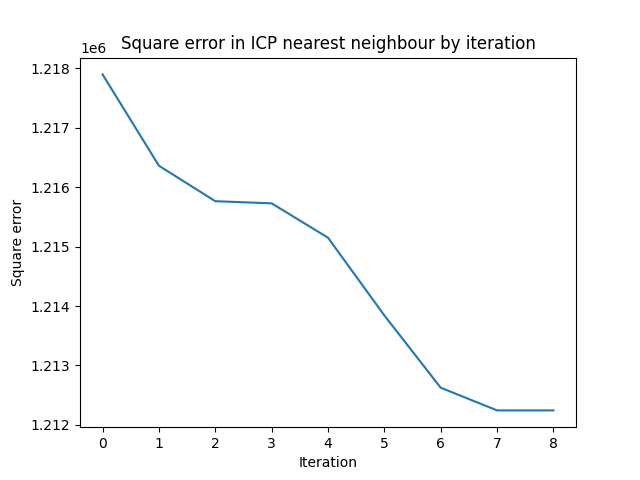

final transform:
 [[0.99487911 0.         0.        ]
 [0.         0.99790472 0.        ]
 [0.         0.         0.99010084]]
First transform:  [[0.97881931 0.         0.        ]
 [0.         0.97881931 0.        ]
 [0.         0.         0.97881931]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


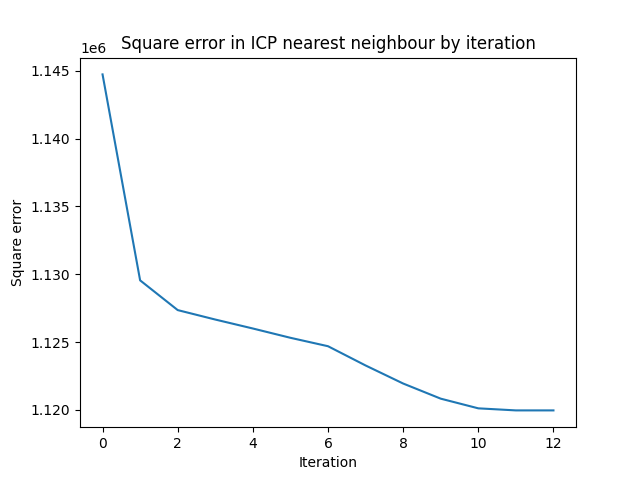

final transform:
 [[0.98492404 0.         0.        ]
 [0.         0.99660407 0.        ]
 [0.         0.         1.00063691]]
First transform:  [[0.9834956 0.        0.       ]
 [0.        0.9834956 0.       ]
 [0.        0.        0.9834956]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


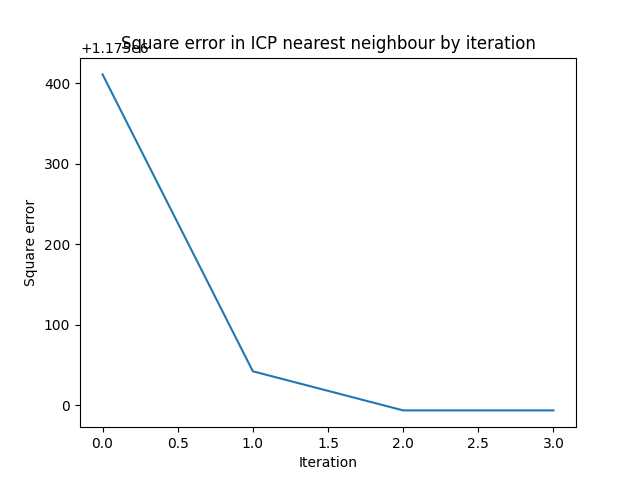

final transform:
 [[0.98661812 0.         0.        ]
 [0.         0.9839336  0.        ]
 [0.         0.         0.99070315]]
First transform:  [[1.00303341 0.         0.        ]
 [0.         1.00303341 0.        ]
 [0.         0.         1.00303341]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


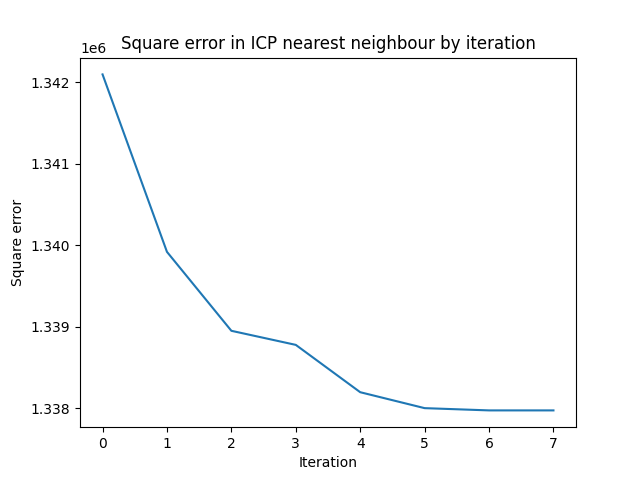

final transform:
 [[0.99032497 0.         0.        ]
 [0.         1.0090865  0.        ]
 [0.         0.         0.99425028]]
First transform:  [[0.9855549 0.        0.       ]
 [0.        0.9855549 0.       ]
 [0.        0.        0.9855549]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


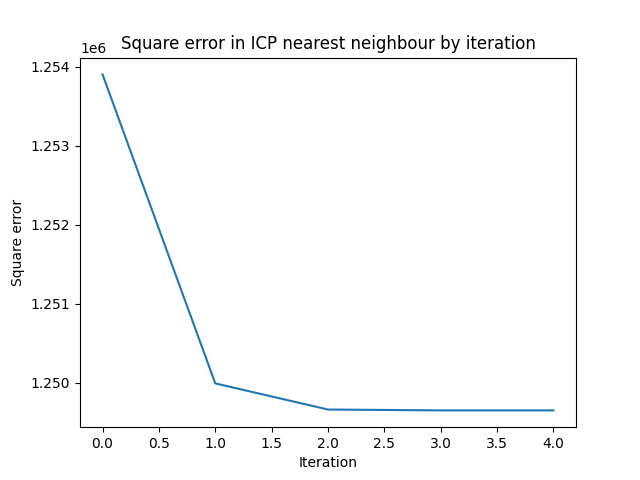

final transform:
 [[0.98552045 0.         0.        ]
 [0.         0.97934729 0.        ]
 [0.         0.         0.99622498]]
First transform:  [[0.99562165 0.         0.        ]
 [0.         0.99562165 0.        ]
 [0.         0.         0.99562165]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


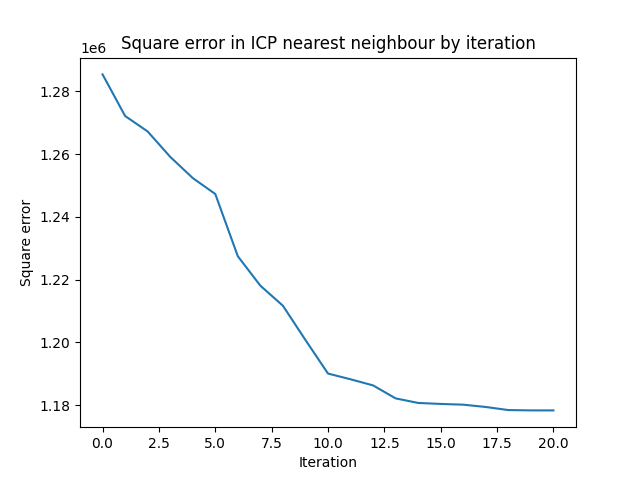

final transform:
 [[0.99080895 0.         0.        ]
 [0.         0.94181468 0.        ]
 [0.         0.         1.00006107]]
First transform:  [[0.9786651 0.        0.       ]
 [0.        0.9786651 0.       ]
 [0.        0.        0.9786651]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


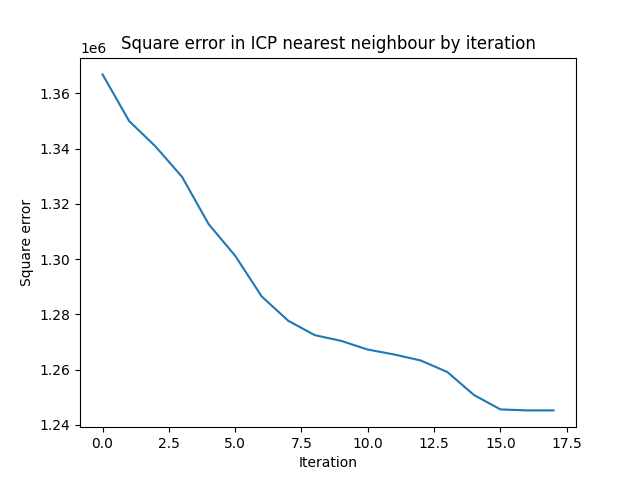

final transform:
 [[0.98658335 0.         0.        ]
 [0.         0.91856704 0.        ]
 [0.         0.         0.99400112]]
First transform:  [[0.97898803 0.         0.        ]
 [0.         0.97898803 0.        ]
 [0.         0.         0.97898803]]


 ./../../AutoDot/perform_registration.py:68: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


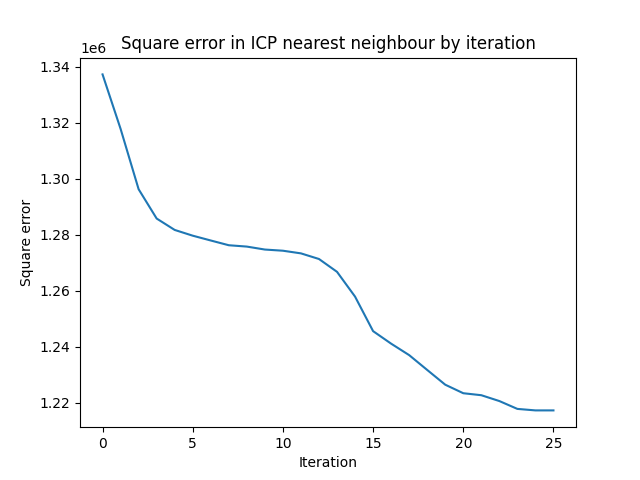

final transform:
 [[0.98335854 0.         0.        ]
 [0.         0.91418357 0.        ]
 [0.         0.         0.99222409]]


In [12]:
transforms = [get_all_gate_transforms(gate, voltages) for gate in gates]

In [15]:
cs_gates = [0, 1, 2]

gate_comps = np.array([gate_comp(cs_gates, list(voltages)[:len(transform)], np.array(transform)) for transform in transforms])


In [16]:
gate_comps

array([<AutoDot.cs_comp_utils.gate_comp object at 0x7fb2d8e24790>,
      dtype=object)

In [18]:
comp_matrix(gate_comps, [-455, -280, -300, -290])

array([[0.99595765, 0.        , 0.        ],
       [0.        , 0.97558369, 0.        ],
       [0.        , 0.        , 1.0162554 ]])

In [19]:
comp_matrix(gate_comps, [-455, -280, -306, -290])

array([[0.99594654, 0.        , 0.        ],
       [0.        , 0.97548885, 0.        ],
       [0.        , 0.        , 1.01632093]])

 <ipython-input-48-222825a8ddee>:3: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


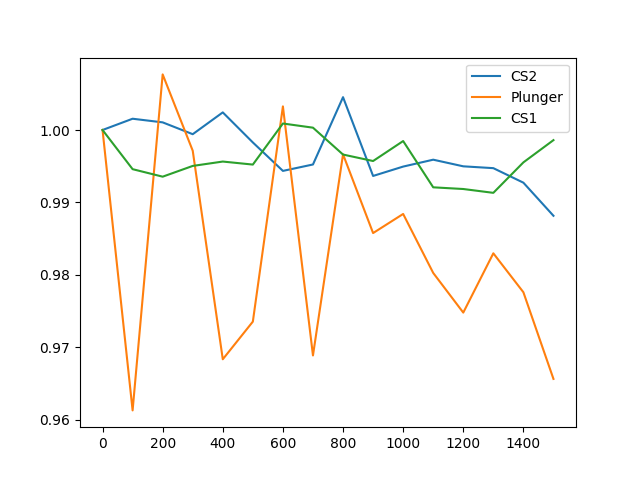

In [48]:
c = np.array(transforms[1])

plt.figure()
plt.plot(voltages[:len(c)], c[:, 0, 0], label="CS2")
plt.plot(voltages[:len(c)], c[:, 1, 1], label="Plunger")
plt.plot(voltages[:len(c)], c[:, 2, 2], label="CS1")
plt.legend()
plt.show()

def plot_gate(name, voltages): 
    trans = np.array(get_all_gate_transforms(name, voltages))
    plt.figure()
    plt.plot(voltages[:len(trans)], trans[:, 0, 0], label="CS2")
    plt.plot(voltages[:len(trans)], trans[:, 1, 1], label="plunger")
    plt.plot(voltages[:len(trans)], trans[:, 2, 2], label="CS1")
    plt.xlabel("Gate voltage")
    plt.ylabel("Scaling factor")
    plt.legend()
    plt.show()
